# „ÄêÁ¨¨‰∏âÊ¨°ËÆÄÊõ∏ÊúÉ„Äë
- **Author: Ê±†ÂìÅÂè°**
- Êó•ÊúüÔºö2024/05/07
- ÁØÑÂúçÔºö
  * week10
  * week11

# 1st. ‰∏ªÈ°åÊ®°Âûã
```python

## 0. Ë≥áÊñôÂèäË™™Êòé
### *Ë≥áÊñô‰æÜÊ∫ê*

1. ËÅØÂêàÊñ∞ËÅûÁ∂≤ (udn)
> ÁõÆÂâçÁöÑË≥áÊñôÁ≠ÜÊï∏Á¥ÑÁÇ∫ 6000 Á≠ÜÔºåÊòØÁî±Êñº TarFlow Âπ≥Âè∞ÁöÑÁà¨Ëü≤Á≠ÜÊï∏ÈôêÂà∂Ôºà<=10000Ôºâ„ÄÇ

### *Êñ∞ËÅûÈ°ûÂà•*
* „ÄêÈÅãÂãï„Äë
* „ÄêÁ§æÊúÉ„Äë
* „ÄêÂÖ®ÁêÉ„Äë
* „ÄêÁî¢Á∂ì„Äë
* „ÄêËÇ°Â∏Ç„Äë
* „ÄêÂÖ©Â≤∏„Äë


## 1. Â•ó‰ª∂Ë™™Êòé

In [1]:
import time 
from functools import reduce
from collections import Counter
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus

import pyLDAvis
import pyLDAvis.gensim_models

In [2]:
# Ë®≠ÂÆöÂúñÁöÑ‰∏≠ÊñáÂ≠óÈ´î (ÁÑ°Ê≥ïÈ°ØÁ§∫ÁöÑË©±ÂèØ‰ª•Ë©¶Ë©¶‚ÄòMicrosoft JhengHei‚ÄôÂ≠óÈ´î)
# ‰πüÂèØÂèÉËÄÉÔºöhttps://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms'] #‰ΩøÂúñ‰∏≠‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['axes.unicode_minus'] = False #‰ΩøË≤†ËôüËÉΩÂ§†È°ØÁ§∫

*`Logging Package`*
Âú®ÈÄ≤Ë°å‰∏ªÈ°åÊ®°ÂûãÁöÑË®ìÁ∑¥ÊôÇÔºåÊàëÂÄëÊúÉ‰ΩøÁî®Âà∞ logging package ‰æÜÈ°ØÁ§∫Ë®ìÁ∑¥ÁöÑÈÄ≤Â∫¶ÔºåÈÄôÈÇäÊàëÂÄëÂÖàË®≠ÂÆö logging ÁöÑÁ≠âÁ¥öÁÇ∫ INFOÔºåËÆìË®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÂèØ‰ª•ÁúãÂà∞Ë®ìÁ∑¥ÁöÑÈÄ≤Â∫¶„ÄÇ

In [3]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## 2. Ë≥áÊñôÂâçËôïÁêÜ

In [4]:
udn = pd.read_csv("raw_data/udn.csv")  # ÂåØË≥áÊñô
udn.head(3)

system_id                  artTitle              artDate artCatagory  \
0          1  ÊπØÊôÆÊ£ÆÊ®ÇÊñºÊé•ÂèóÊõøË£úÂú∞‰Ωç ÊàñË®±ÊòØÈï∑ÁïôÂãáÂ£´ÁöÑÁîüÂ≠ò‰πãÈÅì  2024-03-01 07:00:00          ÈÅãÂãï   
1          2  Êó•ËÅ∑ÔºèÂ§ßËÅØÁõü‰πãÂ§¢ÊÉ≥ÂúìÊªø Êùë‰∏äÂÆóÈöÜËøëÂÖ©Â≠£È†àÈÅîÊàêÊ•≠Á∏æ  2024-03-04 07:00:00          ÈÅãÂãï   
2          3     Ê¥ãÂü∫Á¨¨‰∏ÄÊ£íË©≤Ê¥æË™∞ÊâìÔºü Á¥¢ÊâòÊàñË®±ÊâçÊòØÊúÄ‰Ω≥‰∫∫ÈÅ∏  2024-03-04 07:00:00          ÈÅãÂãï   

                           artSecondCatagory  \
0  https://udn.com/news/story/122629/7801017   
1  https://udn.com/news/story/122629/7806019   
2  https://udn.com/news/story/122629/7806063   

                                              artUrl  artContent dataSource  
0  ÊπØÊôÆÊ£Æ(Klay Tompson)ËøëÊúüÈÄ£Á∫å‰∫îÂ†¥ÁêÉË¢´ÂãáÂ£´ÊïôÁ∑¥ÂúòÈôçÁÇ∫ÊõøË£úÔºåÈÄô‰πüÊòØ‰ªñÊâìÂæûÊñ∞‰∫∫Âπ¥‰ª•‰æÜ...         NaN        UDN  
1  ÂâõÊâìÂÆåÂè∞ÁÅ£ÈÅ†ÂæÅÊØîË≥ΩÁöÑËÆÄË≥£Â∑®‰∫∫ÔºåËøîÂõûÊó•Êú¨‰πãÂæåÊ∫ñÂÇôËøéÊé•ÂÆòËæ¶ÁÜ±Ë∫´Ë≥ΩÔºåÁÇ∫2024Âπ¥‰æãË°åË≥Ω‰πãÂâçÂÅöÊúÄÂæåÂÇô...         NaN        UDN  
2  Ë™∞ÊòØÊ¥ãÂü∫ÈöäÂè≤‰∏äÊúÄÂÅâÂ§ßÁöÑÈñãË∑ØÂÖàÈãíÔºüÈ†≠‰∏ÄÂÄãÊúÉÊÉ≥Âà∞ÁöÑÂÖ´ÊàêÊòØ„ÄåÈöäÈï∑„ÄçÂü∫ÁâπÔºàDerek JeterÔºâ„ÄÇ...         NaN        UDN

In [5]:
# manipulate data columns
udn['artContent'] = udn['artUrl']
udn = udn.drop(columns=['system_id', 'artSecondCatagory', 'dataSource'])
# ÁØ©Êéâ‰∏çÈúÄË¶ÅÁöÑÂàÜÈ°û
cat2drop = ['Ë¶ÅËÅû', 'ÁîüÊ¥ª']
udn = udn[~udn['artCatagory'].isin(cat2drop)]

In [6]:
# Ê™¢Êü•ÁõÆÂâçÈ°ûÂà•
udn['artCatagory'].unique()

array(['ÈÅãÂãï', 'ÂÖ®ÁêÉ', 'Á§æÊúÉ', 'Áî¢Á∂ì', 'ËÇ°Â∏Ç', 'ÂÖ©Â≤∏'], dtype=object)

In [7]:
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
udn["artContent"] = udn["artContent"].str.replace("(http|https)://.*", "", regex=True)
udn["artTitle"] = udn["artTitle"].str.replace("(http|https)://.*", "", regex=True)
udn["artContent"] = udn["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
udn["artTitle"] = udn["artTitle"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
udn['content'] = udn['artContent']


udn = udn.loc[:,["content", "artUrl", "artCatagory", 'artDate']]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê
udn.head(3)

content  \
0  ÊπØÊôÆÊ£ÆËøëÊúüÈÄ£Á∫å‰∫îÂ†¥ÁêÉË¢´ÂãáÂ£´ÊïôÁ∑¥ÂúòÈôçÁÇ∫ÊõøË£úÈÄô‰πüÊòØ‰ªñÊâìÂæûÊñ∞‰∫∫Âπ¥‰ª•‰æÜÈ¶ñÂ∫¶ÂæûÊùøÂá≥Âá∫ÁôºÊìöÁµ±Ë®àÊπØÊôÆÊ£ÆÊ≠§Ââç...   
1  ÂâõÊâìÂÆåÂè∞ÁÅ£ÈÅ†ÂæÅÊØîË≥ΩÁöÑËÆÄË≥£Â∑®‰∫∫ËøîÂõûÊó•Êú¨‰πãÂæåÊ∫ñÂÇôËøéÊé•ÂÆòËæ¶ÁÜ±Ë∫´Ë≥ΩÁÇ∫Âπ¥‰æãË°åË≥Ω‰πãÂâçÂÅöÊúÄÂæåÂÇôÊà∞Â∑®‰∫∫ËªçÊÉ≥Ë¶Å...   
2  Ë™∞ÊòØÊ¥ãÂü∫ÈöäÂè≤‰∏äÊúÄÂÅâÂ§ßÁöÑÈñãË∑ØÂÖàÈãíÈ†≠‰∏ÄÂÄãÊúÉÊÉ≥Âà∞ÁöÑÂÖ´ÊàêÊòØÈöäÈï∑Âü∫Áâπ‰∏çÈÅéÂü∫ÁâπÂÖ∂ÂØ¶ÊòØÂú®Âπ¥ÈÅéÁöÑÁîüÊ∂ØÁ¨¨ÂÄãÁêÉÂ≠£...   

                                              artUrl artCatagory  \
0  ÊπØÊôÆÊ£Æ(Klay Tompson)ËøëÊúüÈÄ£Á∫å‰∫îÂ†¥ÁêÉË¢´ÂãáÂ£´ÊïôÁ∑¥ÂúòÈôçÁÇ∫ÊõøË£úÔºåÈÄô‰πüÊòØ‰ªñÊâìÂæûÊñ∞‰∫∫Âπ¥‰ª•‰æÜ...          ÈÅãÂãï   
1  ÂâõÊâìÂÆåÂè∞ÁÅ£ÈÅ†ÂæÅÊØîË≥ΩÁöÑËÆÄË≥£Â∑®‰∫∫ÔºåËøîÂõûÊó•Êú¨‰πãÂæåÊ∫ñÂÇôËøéÊé•ÂÆòËæ¶ÁÜ±Ë∫´Ë≥ΩÔºåÁÇ∫2024Âπ¥‰æãË°åË≥Ω‰πãÂâçÂÅöÊúÄÂæåÂÇô...          ÈÅãÂãï   
2  Ë™∞ÊòØÊ¥ãÂü∫ÈöäÂè≤‰∏äÊúÄÂÅâÂ§ßÁöÑÈñãË∑ØÂÖàÈãíÔºüÈ†≠‰∏ÄÂÄãÊúÉÊÉ≥Âà∞ÁöÑÂÖ´ÊàêÊòØ„ÄåÈöäÈï∑„ÄçÂü∫ÁâπÔºàDerek JeterÔºâ„ÄÇ...          ÈÅãÂãï   

               artDate  
0  2024-03-01 07:00:00  
1  2024-03-04 07:00:00  
2  2024-03-04 07:00:00

In [8]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary("./dict/dict.txt.big")

# Êñ∞Â¢ûstopwords
# jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tagsÊâçÊúÉ‰ΩúÁî®
with open("./dict/stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº1ÁöÑË©ûÂΩô
    return seg_list

udn["words"] = udn["content"].apply(getToken)
udn.head()

Building prefix dict from /Users/raychi/Desktop/code/SA/handedin/Á¨¨‰∏âÁµÑ_HW3/dict/dict.txt.big ...
2024-05-06 10:36:11,794 : DEBUG : Building prefix dict from /Users/raychi/Desktop/code/SA/handedin/Á¨¨‰∏âÁµÑ_HW3/dict/dict.txt.big ...
Dumping model to file cache /var/folders/q3/g1qdy2wx5r1582rn40qsrsg40000gn/T/jieba.uf814682fbd598f7dfa57ce9b3f4db538.cache
2024-05-06 10:36:12,180 : DEBUG : Dumping model to file cache /var/folders/q3/g1qdy2wx5r1582rn40qsrsg40000gn/T/jieba.uf814682fbd598f7dfa57ce9b3f4db538.cache
Loading model cost 0.422 seconds.
2024-05-06 10:36:12,216 : DEBUG : Loading model cost 0.422 seconds.
Prefix dict has been built successfully.
2024-05-06 10:36:12,217 : DEBUG : Prefix dict has been built successfully.


content  \
0  ÊπØÊôÆÊ£ÆËøëÊúüÈÄ£Á∫å‰∫îÂ†¥ÁêÉË¢´ÂãáÂ£´ÊïôÁ∑¥ÂúòÈôçÁÇ∫ÊõøË£úÈÄô‰πüÊòØ‰ªñÊâìÂæûÊñ∞‰∫∫Âπ¥‰ª•‰æÜÈ¶ñÂ∫¶ÂæûÊùøÂá≥Âá∫ÁôºÊìöÁµ±Ë®àÊπØÊôÆÊ£ÆÊ≠§Ââç...   
1  ÂâõÊâìÂÆåÂè∞ÁÅ£ÈÅ†ÂæÅÊØîË≥ΩÁöÑËÆÄË≥£Â∑®‰∫∫ËøîÂõûÊó•Êú¨‰πãÂæåÊ∫ñÂÇôËøéÊé•ÂÆòËæ¶ÁÜ±Ë∫´Ë≥ΩÁÇ∫Âπ¥‰æãË°åË≥Ω‰πãÂâçÂÅöÊúÄÂæåÂÇôÊà∞Â∑®‰∫∫ËªçÊÉ≥Ë¶Å...   
2  Ë™∞ÊòØÊ¥ãÂü∫ÈöäÂè≤‰∏äÊúÄÂÅâÂ§ßÁöÑÈñãË∑ØÂÖàÈãíÈ†≠‰∏ÄÂÄãÊúÉÊÉ≥Âà∞ÁöÑÂÖ´ÊàêÊòØÈöäÈï∑Âü∫Áâπ‰∏çÈÅéÂü∫ÁâπÂÖ∂ÂØ¶ÊòØÂú®Âπ¥ÈÅéÁöÑÁîüÊ∂ØÁ¨¨ÂÄãÁêÉÂ≠£...   
3  ËøëÊúüÂ™íÈ´îÂ†±Â∞éÊ®ÇÂ§©Ê°ÉÁåøÊïôÁ∑¥ÂúòË®àÁï´Â∞áÂÖàÁôºÊäïÊâãÊõæ‰ªÅÂíåËΩâË™øÁâõÊ£öÈô≥ÂÜ†ÂÆáËá™Ë´ãÈáçÂõûÂÖàÁôºËÄÅÂØ¶Ë™™ÈÄôÊ®£ÁöÑÂÆâÊéíÈ¢®Èö™...   
4  Êí∞ÊñáÁü≥ÊØìÁê™ÂõõÂπ¥ÂâçËÅ∑Ê•≠Ê£íÁêÉÈõúË™åÊñºÁêÉÊò•Âà∞‰æÜÈñãÂ≠£Êò•Ë®ìÁâπËºØÂ∞ÅÈù¢Êîæ‰∏äÊôÇ‰ªªÈöäÁ∏ΩÊïôÁ∑¥Âø´ËΩâÂÄãÁêÉÂ≠£Âè™Ââ©‰∏ãËøëÂπ¥Êëò...   

                                              artUrl artCatagory  \
0  ÊπØÊôÆÊ£Æ(Klay Tompson)ËøëÊúüÈÄ£Á∫å‰∫îÂ†¥ÁêÉË¢´ÂãáÂ£´ÊïôÁ∑¥ÂúòÈôçÁÇ∫ÊõøË£úÔºåÈÄô‰πüÊòØ‰ªñÊâìÂæûÊñ∞‰∫∫Âπ¥‰ª•‰æÜ...          ÈÅãÂãï   
1  ÂâõÊâìÂÆåÂè∞ÁÅ£ÈÅ†ÂæÅÊØîË≥ΩÁöÑËÆÄË≥£Â∑®‰∫∫ÔºåËøîÂõûÊó•Êú¨‰πãÂæåÊ∫ñÂÇôËøéÊé•ÂÆòËæ¶ÁÜ±Ë∫´Ë≥ΩÔºåÁÇ∫2024Âπ¥‰æãË°åË≥Ω‰πãÂâçÂÅöÊúÄÂæåÂÇô...          ÈÅãÂãï   
2  Ë™∞ÊòØÊ¥ãÂü∫ÈöäÂè≤‰∏äÊúÄÂÅâÂ§ßÁöÑÈñãË∑ØÂÖàÈãíÔºüÈ†≠‰∏ÄÂÄãÊúÉÊÉ≥Âà∞ÁöÑÂÖ´ÊàêÊòØ„ÄåÈöäÈï∑„ÄçÂü∫ÁâπÔºàDerek JeterÔºâ„ÄÇ...          ÈÅãÂãï   
3  ËøëÊúüÂ™íÈ´îÂ†±Â∞éÔºåÊ®ÇÂ§©Ê°ÉÁåøÊïôÁ∑¥ÂúòË®àÁï´Â∞áÂÖàÁôºÊäïÊâãÊõæ‰ªÅÂíåËΩâË™øÁâõÊ£öÔºåÈô≥ÂÜ†ÂÆáËá™Ë´ãÈáçÂõûÂÖàÁôºÔºåËÄÅÂØ¶Ë™™ÔºåÈÄôÊ®£ÁöÑ...          ÈÅãÂãï   
4  „ÄêÊí∞Êñá„ÉªÁü≥ÊØìÁê™„ÄëÂõõÂπ¥Ââç„ÄäËÅ∑Ê•≠Ê£íÁêÉ„ÄãÈõúË™åÊñº„ÄàÁêÉÊò•Âà∞‰æÜ ÈñãÂ≠£Êò•Ë®ìÁâπËºØ„ÄâÂ∞ÅÈù¢Êîæ‰∏äÊôÇ‰ªª5ÈöäÁ∏ΩÊïôÁ∑¥ÔºåÂø´...          ÈÅãÂãï   

               artDate                                              words  
0  2024-03-01 07:00:00  [ÊπØÊôÆÊ£Æ, ËøëÊúü, ÈÄ£Á∫å, ‰∫îÂ†¥, ÂãáÂ£´, ÊïôÁ∑¥, ÂúòÈôç, ÊõøË£ú, ÈÄô‰πü, Êñ∞‰∫∫, ‰ª•‰æÜ, ...  
1  2024-03-04 07:00:00  [ÂâõÊâì, ÂÆåÂè∞ÁÅ£, ÈÅ†ÂæÅ, ÊØîË≥Ω, ËÆÄË≥£, Â∑®‰∫∫, ËøîÂõû, Êó•Êú¨, ‰πãÂæå, Ê∫ñÂÇô, ËøéÊé•, ...  
2  2024-03-04 07:00:00  [Ê¥ãÂü∫Èöä, Âè≤‰∏ä, ÂÅâÂ§ß, ÈñãË∑ØÂÖàÈãí, ÊÉ≥Âà∞, ÈöäÈï∑, Âü∫Áâπ, Âü∫Áâπ, Âπ¥ÈÅé, ÁîüÊ∂Ø, Á¨¨ÂÄã...  
3  2024-03-04 07:00:00  [ËøëÊúü, Â™íÈ´î, Â†±Â∞é, Ê®ÇÂ§©, Ê°ÉÁåø, ÊïôÁ∑¥, ÂúòË®à, Áï´Â∞á, ÂÖàÁôº, ÊäïÊâã, ‰ªÅÂíå, ËΩâ...  
4  2024-03-06 12:00:00  [Êí∞Êñá, Áü≥ÊØìÁê™, ÂõõÂπ¥, ËÅ∑Ê•≠, Ê£íÁêÉ, ÈõúË™å, ÁêÉÊò•, Âà∞‰æÜ, ÈñãÂ≠£, Êò•Ë®ì, ÁâπËºØ, ...

In [9]:
udn.groupby(['artCatagory']).size()

artCatagory
ÂÖ®ÁêÉ    1218
ÂÖ©Â≤∏     751
Áî¢Á∂ì    1308
Á§æÊúÉ    1048
ËÇ°Â∏Ç    1095
ÈÅãÂãï     567
dtype: int64

## 3. Lexicon-based / ‰∫∫Â∑•Áµ¶ÂÆö‰∏ªÈ°åÁöÑ‰∏ªÈ°åÊ®°Âûã

In [10]:
# Ê†πÊìö 6 ÂÄã‰∏ªÈ°åÁµ¶‰∫àÈ†òÂüüÁöÑÁõ∏ÈóúË©ûÂΩô
custom_topic_word = {
    "ÈÅãÂãï": [
        "Ê£íÁêÉ",
        "ËÅ∑Ê£í",
        "ÊØîË≥Ω",
        "Ë≥Ω‰∫ã",
        "ÁêÉÂì°",
        "È†êË≥Ω",
        "ÊäïÊâã",
        "Êà∞Á∏æ",
        "ÁêÉÈöä",
        "Ë≥ΩÁ®ã",
        "ÁêÉËø∑",
        "ÈÅ∏Êâã",
        "Â§ßËÅØÁõü",
        "Êò•Ë®ì",
        "ÂàÜÁµÑ",
        "ÂÖàÁôº",
        "ÊØîÂàÜ",
        "ÂÆâÊâì",
        "Â§ßË∞∑",
        "Â§ßË∞∑ÁøîÂπ≥",
        "ËÅØÁõü",
        "ÂÜ†Ëªç",
        "ÊâìÊìä",
        "ÁêÉÂúò"
    ],
    "ËÇ°Â∏Ç": [
        'ÊåáÊï∏',
        'Âè∞ËÇ°',
        'Â∏ÇÂ†¥',
        'ÊäïË≥á',
        'ÁæéÂúã',
        '‰∏äÊº≤',
        'ÊäïË≥á‰∫∫',
        'ËÇ°ÂÉπ',
        'Ë°®Áèæ',
    ],
    "Á§æÊúÉ": [
        "Ë°®Á§∫", "Ë≠¶Êñπ", "‰ªäÂ§©", "Áî∑Â≠ê", "ÁôºÁèæ", "ÁôºÁîü", "Ë®òËÄÖ", "Ëê¨ÂÖÉ", "Â†±Â∞é", "ÊåáÂá∫"
    ],
    "Áî¢Á∂ì": [
        "‰∏≠Âúã",
        "Â§ßÈô∏",
        "ÂÖ©Â≤∏",
        "ÁøíËøëÂπ≥",
        "Âåó‰∫¨",
        "‰∫∫Ê∞ëÂπ£",
        "‰∏≠ÂÖ±",
        "‰∏äÊµ∑",
        "ÂúãÂãôÈô¢",
        "ÊùéÂº∑",
        "ËèØÁÇ∫",
        "ÊîøÂçî",
        "ÂÖ©ÊúÉ",
    ],
    "ÂÖ®ÁêÉ": [
        "‰∏≠Âúã", "Ë°®Á§∫", "Â§ßÈô∏", "Âè∞ÁÅ£", "ÁôºÂ±ï", "Â∑•‰Ωú", "ÂúãÂÆ∂", "ÊîøÂ∫ú", "ÊåáÂá∫", "ÁæéÂúã"
    ],
    'ÂÖ©Â≤∏': [
        '‰∏≠Âúã',
        'Â§ßÈô∏',
        'ÂÖ©Â≤∏',
        'ÁøíËøëÂπ≥',
        'Âåó‰∫¨',
        'Âè∞ÁÅ£',
        'ÂúãÂè∞Ëæ¶',
        'ÂúãÊ∞ëÈª®',
        'Ê∞ëÈÄ≤Èª®',
        'Âè∞Âåó',
        'È¶ôÊ∏Ø',
        'ÂúãÂÆ∂',
        'ÊîøÂ∫ú',
        '‰∏≠ÂÖ±',
        'Âè∞ÂïÜ',
        'ÂÖ©ÊúÉ',
        '‰∏≠Â§Æ',
        'ÊîøÊ≤ª',
        'ÊîøÁ≠ñ',
        'ÂúãÈöõ',
        'ÂïèÈ°å',
    ]
}

In [11]:
vocabularies = np.unique(reduce(lambda x, y: x + y, custom_topic_word.values()))

Âà©Áî® CountVectorizer ÁöÑ vocabulary ÂèÉÊï∏‰æÜÁØ©ÈÅ∏„ÄÅË£Ω‰Ωú DTM

In [12]:
udn_corpus = udn['words'].map(" ".join)
vectorizer = CountVectorizer(vocabulary=vocabularies)
udn_matrix = vectorizer.fit_transform(udn_corpus)

udn_matrix = udn_matrix.toarray()
feature_names = vectorizer.get_feature_names_out()

In [13]:
df_count = pd.DataFrame({})
# key: topic name, value: topic words
# np.isin() to check if the word is in the feature_names
# Ëº∏Âá∫ÁöÑÁµêÊûúÊòØ‰∏ÄÂÄãÂ∏ÉÊûóÂÄºÁöÑÈô£ÂàóÔºå‰ª£Ë°®ËëóË©≤ÂÖÉÁ¥†ÊòØÂê¶Âú®Âè¶‰∏ÄÂÄãÈô£Âàó‰∏≠
# ÈÅ∏Âá∫Á¨¶ÂêàÁöÑË©ûÂΩôÔºå‰∏¶Ë®àÁÆóÂá∫ÁèæÊ¨°Êï∏
# udn_matrix[:, idx] ÂèñÂá∫Á¨¶ÂêàÁöÑË©ûÂΩô
# sum(axis=1) Ë®àÁÆóÊ¨°Êï∏
for k, v in custom_topic_word.items():
    idx = np.isin(
        feature_names,
        v
    )
    df_count[f'topic_{k}'] = udn_matrix[:, idx].sum(axis=1)
    
df_count.head()

topic_ÈÅãÂãï  topic_ËÇ°Â∏Ç  topic_Á§æÊúÉ  topic_Áî¢Á∂ì  topic_ÂÖ®ÁêÉ  topic_ÂÖ©Â≤∏
0        19         3         1         0         0         0
1        26         1         0         0         1         3
2        24         8         3         0         2         0
3        35         6         2         0         2         4
4        66        10         4         0        20         9

Ë®àÁÆóÊØèÂÄãÊñá‰ª∂ÁöÑ‰∏ªÈ°åÂàÜÂ∏ÉÔºànormalizedÔºâ

In [14]:
thetas = df_count.div(
    df_count.sum(axis=1),
    axis=0
)
thetas.head()

topic_ÈÅãÂãï  topic_ËÇ°Â∏Ç  topic_Á§æÊúÉ  topic_Áî¢Á∂ì  topic_ÂÖ®ÁêÉ  topic_ÂÖ©Â≤∏
0  0.826087  0.130435  0.043478       0.0  0.000000  0.000000
1  0.838710  0.032258  0.000000       0.0  0.032258  0.096774
2  0.648649  0.216216  0.081081       0.0  0.054054  0.000000
3  0.714286  0.122449  0.040816       0.0  0.040816  0.081633
4  0.605505  0.091743  0.036697       0.0  0.183486  0.082569

In [15]:
# Á¢∫Ë™çË≥áÊñôÁ≠ÜÊï∏
thetas.index.stop

5987

## 4. LDA ‰∏ªÈ°åÊ®°Âûã
Latent Dirichlet allocation Á∞°Á®± LDAÔºåÊòØ‰∏ÄÁ®Æ‰∏ªÈ°åÊ®°ÂûãÔºå‰ªñÂèØ‰ª•Â∞áË≥áÊñôÈõÜ‰∏≠ÊØèÁØáÊñáÊ™îÁöÑ‰∏ªÈ°åÊåâÁÖßÊ©üÁéáÂàÜ‰ΩàÔºå‰ªñÊòØÁÑ°Áõ£Áù£Â≠∏ÁøíÊ≥ïÔºåË®ìÁ∑¥ÊôÇ‰∏çÈúÄË¶ÅÊâãÂãïÊ®ôË®ªÔºåÂè™ÈúÄË¶ÅÁµ¶ÊñáÊ™îÈõÜ„ÄÅ‰∏ªÈ°åÊï∏Ôºå‰πüÂèØ‰ª•Ê†πÊìö‰∏Ä‰∫õÂèÉÊï∏(alpha„ÄÅBeta)‰æÜÊîπËÆäÊ®°ÂûãË®ìÁ∑¥ÁöÑÁµêÊûúÔºå‰ª•‰∏ã‰ΩøÁî® gensim Â•ó‰ª∂‰æÜÁ§∫ÁØÑÂ¶Ç‰ΩïË®ìÁ∑¥ LDA Ê®°Âûã„ÄÇ

Á∞°ÂñÆÁöÑÁØÑ‰æãË™™Êòé `gensim` bag of word ÁöÑÊñπÂºè

**4.1 Ê≠£ÂºèËôïÁêÜÊñ∞ËÅû**

In [16]:
docs = udn['words'].to_list()
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=5, no_above=0.7)
print(dictionary)

2024-05-06 10:36:25,589 : INFO : adding document #0 to Dictionary<0 unique tokens: []>


2024-05-06 10:36:26,039 : INFO : built Dictionary<87594 unique tokens: ['‰∏Ä‰∏ñ', '‰∏ÄÂì°', '‰∏ÄÂ†¥', '‰∏ÄÊïó', '‰∏ÄÁí∞']...> from 5987 documents (total 1234689 corpus positions)
2024-05-06 10:36:26,040 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<87594 unique tokens: ['‰∏Ä‰∏ñ', '‰∏ÄÂì°', '‰∏ÄÂ†¥', '‰∏ÄÊïó', '‰∏ÄÁí∞']...> from 5987 documents (total 1234689 corpus positions)", 'datetime': '2024-05-06T10:36:26.040296', 'gensim': '4.3.2', 'python': '3.8.19 (default, Mar 20 2024, 15:27:52) \n[Clang 14.0.6 ]', 'platform': 'macOS-14.4.1-arm64-arm-64bit', 'event': 'created'}
2024-05-06 10:36:26,068 : INFO : discarding 67941 tokens: [('‰∏Ä‰∏ñ', 4), ('‰∏ÄÊïó', 2), ('‰∫åÁï∂ÂÆ∂', 1), ('‰∫îÂÖ≠Âπ¥', 1), ('‰∫îÂ†¥', 4), ('‰ª§‰∫∫Â∞äÊï¨', 2), ('‰ª•ÂÖà', 1), ('ÂÄöËÄÅË≥£ËÄÅ', 1), ('Âà•‰ª∂', 1), ('Âä†Âúñ', 1)]...
2024-05-06 10:36:26,069 : INFO : keeping 19653 tokens which were in no less than 5 and no more than 4190 (=70.0%) documents
2024-05-06 10:36:26,085 : INFO : resulting dictionary:

Dictionary<19653 unique tokens: ['‰∏ÄÂì°', '‰∏ÄÂ†¥', '‰∏ÄÁí∞', '‰∏ÄÁõ¥', '‰∏ÄËÇ°']...>


Â∞áÊñ∑Ë©ûÁµêÊûúÂª∫ÊßãË™ûÊñôÂ∫´(corpus)‰πãÂæåÔºåÂà©Áî®Ë™ûÊñôÂ∫´ÊääÊØèÁØáÊñáÁ´†Êï∏Â≠óÂåñ„ÄÇ<br>
ÊØèÂÄãË©ûÂΩôÈÉΩË¢´Ë≥¶‰∫à‰∏ÄÂÄã ID ÂèäÈ†ªÁéá(word_idÔºåword_frequency)„ÄÇ<br>



### Âª∫Á´ãË™ûÊñôÂ∫´(corpus)ÂèäÂ≠óÂÖ∏(dictionary)

In [17]:
# Bag-of-words representation of the documents.
# Áî® gensim ldamodel input ÈúÄË¶ÅÂ∞áÊñáÁ´†ËΩâÊèõÊàê bag of words 
corpus = [dictionary.doc2bow(doc) for doc in docs]

`LdaModel()`
+ ÂèÉÊï∏Ë™™ÊòéÔºö
    + corpus = ÊñáÊ™îË™ûÊñôÂ∫´
    + id2word = Ë©ûÂΩôÂ≠óÂÖ∏
    + num_topics = ÁîüÊàêÂπæÂÄã‰∏ªÈ°åÊï∏
    + random_state = Âõ∫ÂÆö‰∫ÇÊï∏ÂÄºÔºåÊØèÊ¨°ÁöÑÊ®°ÂûãÁµêÊûúÊúÉ‰∏ÄÊ®£
    + iteration = ÊØèÂÄãÊñáÁ´†Ë®ìÁ∑¥ÁöÑÊ¨°Êï∏ÔºåÂèØ‰ª•Ë®≠ÂÆöÈ´ò‰∏ÄÈªûËÆìÊ®°ÂûãÊî∂ÊñÇ
    + passes(epoch) = Êï¥ÂÄã corpus Ë®ìÁ∑¥Ê®°ÂûãÁöÑÊ¨°Êï∏
    + alpha = ÊñáÁ´†‰∏ªÈ°åÂàÜ‰Ωà
    + eta = ‰∏ªÈ°åÂ≠óÂàÜ‰Ωà


+ **Pointwise Mutual Information (PMI)** : <br>
Ëá™ÁÑ∂Ë™ûË®ÄËôïÁêÜ‰∏≠ÔºåÊÉ≥Ë¶ÅÊé¢Ë®éÂÖ©ÂÄãÂ≠ó‰πãÈñìÊòØÂê¶Â≠òÂú®ÊüêÁ®ÆÈóú‰øÇ„ÄÇ<br>
‰æãÂ¶ÇÔºöÊüê‰∫õÂ≠óÊúÉ‰∏ÄËµ∑Âá∫ÁèæÔºåÂèØËÉΩÂ∏∂ÊúâÊüê‰∫õË®äÊÅØÔºåÂõ†Ê≠§ÈÄôÂÄãÂèØ‰ª•Áî® PMI ‰æÜË®àÁÆóÔºåÊï∏Â≠óË∂äÂ§ßË∂äÂ•Ω„ÄÇ
+ **perplexity** :<br>
perplexity ‰πüÊòØË©ï‰º∞ÁöÑÊåáÊ®ô‰πã‰∏ÄÔºåÂª£Ê≥õÁî®ÊñºË™ûË®ÄÊ®°ÂûãÁöÑË©ï‰º∞ÔºåÊÑèÊÄùÁÇ∫Ë§áÈõúÂ∫¶ÔºåÂõ†Ê≠§Êï∏Â≠óË¶ÅË∂äÂ∞èË∂äÂ•Ω„ÄÇ

> `NPMI` ÁöÑÂÄºÂüüÊòØ[-1,1]Ôºå-1 ‰ª£Ë°®ÂÖ©ÂÄãÂ≠óÊ≤í‰∏ÄËµ∑Âá∫ÁèæÈÅéÔºå0 ‰ª£Ë°®ÂÖ©ÂÄãÂ≠ó‰πãÈñìÁç®Á´ãÔºå1 ‰ª£Ë°®ÂÖ©ÂÄãÂ≠óÂÆåÂÖ®Áõ∏Èóú

In [18]:
model_6 = LdaModel(
    corpus = corpus,
    num_topics = 7,
    id2word=dictionary,
    random_state = 1500,
    passes = 5 # Ë®ìÁ∑¥Ê¨°Êï∏
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_6, corpus, dictionary)
p

2024-05-06 10:36:26,328 : INFO : using symmetric alpha at 0.14285714285714285
2024-05-06 10:36:26,329 : INFO : using symmetric eta at 0.14285714285714285
2024-05-06 10:36:26,330 : INFO : using serial LDA version on this node
2024-05-06 10:36:26,335 : INFO : running online (multi-pass) LDA training, 7 topics, 5 passes over the supplied corpus of 5987 documents, updating model once every 2000 documents, evaluating perplexity every 5987 documents, iterating 50x with a convergence threshold of 0.001000
2024-05-06 10:36:26,335 : INFO : PROGRESS: pass 0, at document #2000/5987
2024-05-06 10:36:26,762 : INFO : merging changes from 2000 documents into a model of 5987 documents
2024-05-06 10:36:26,766 : INFO : topic #4 (0.143): 0.009*"Ë°®Á§∫" + 0.007*"‰ªäÂ§©" + 0.005*"ÁæéÂúã" + 0.004*"‰ªäÂπ¥" + 0.004*"ÊãúÁôª" + 0.004*"Â†±Â∞é" + 0.003*"ÂéªÂπ¥" + 0.003*"ÂÖ¨Âè∏" + 0.003*"Â∑®Ëõã" + 0.003*"Á∏ΩÁµ±"
2024-05-06 10:36:26,766 : INFO : topic #6 (0.143): 0.008*"ÁæéÂúã" + 0.006*"‰∏≠Âúã" + 0.006*"Ë°®Á§∫" + 0

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.087822  0.000418       1        1  23.402379
6     -0.030032 -0.181958       2        1  18.648590
0      0.230465  0.109849       3        1  14.158879
1      0.207846  0.071276       4        1  13.755304
2     -0.208376  0.021177       5        1  11.604135
4     -0.007697 -0.172707       6        1   9.810538
5     -0.280028  0.151945       7        1   8.620174, topic_info=      Term         Freq        Total Category  logprob  loglift
1859    ‰∏≠Âúã  5223.000000  5223.000000  Default  30.0000  30.0000
4693    ÂÑÑÂÖÉ  4061.000000  4061.000000  Default  29.0000  29.0000
2761    Ë≠¶Êñπ  1754.000000  1754.000000  Default  28.0000  28.0000
12514   ÁáüÊî∂  2091.000000  2091.000000  Default  27.0000  27.0000
90      Â∏ÇÂ†¥  3597.000000  3597.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
2713    ÂçîÂä©   219.880258   780.675636   Topic7  -6.0655   1.1840
4973    ÂÆâÂÖ®   232.164733  1437.939021   Topic7  -6.0112   0.6275
10815   Ê™¢Êñπ   202.563644   455.400549   Topic7  -6.1476   1.6409
316     ÂâçÂæÄ   203.425423   495.354536   Topic7  -6.1433   1.5611
531     ÊåáÂá∫   220.953760  3397.744153   Topic7  -6.0607  -0.2818

[581 rows x 6 columns], token_table=       Topic      Freq Term
term                       
656        1  0.016705   ‰∏ÄÂêç
656        2  0.143661   ‰∏ÄÂêç
656        3  0.003341   ‰∏ÄÂêç
656        4  0.011693   ‰∏ÄÂêç
656        5  0.474414   ‰∏ÄÂêç
...      ...       ...  ...
17501      4  0.996386   È´òÊÅØ
15730      5  0.977633  È´òËôπÂÆâ
15730      7  0.012534  È´òËôπÂÆâ
15410      5  0.980655   È´òÈô¢
13509      4  0.994786   ÈªûÊî∂

[1646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 1, 2, 3, 5, 6])

**4.4 ÈÄèÈÅéÊåáÊ®ôÊâæÂá∫ÊúÄ‰Ω≥‰∏ªÈ°åÊï∏**

ÈÄèÈÅéÂª∫Á´ã‰∏çÂêå‰∏ªÈ°åÊï∏ÁöÑÊ®°ÂûãÔºå‰∏¶‰ª•‰∏äËø∞ÊâÄË™™ÁöÑ**Âà§Êñ∑ÊåáÊ®ô**‰æÜÊâæÂá∫ÊúÄ‰Ω≥ÁöÑ‰∏ªÈ°åÊï∏„ÄÇ<br>
ÈÄôË£°ÊàëÂÄëÈÅ∏Êìá‰∏ªÈ°åÊï∏ 2~10 ‰æÜÂÅöÂàÜÊûê„ÄÇ

**ÂÜçÊ¨°Âº∑Ë™ø**Ôºö‰∏ªÈ°åÊï∏ÂèäÂèÉÊï∏Ê≤íÊúâ‰∏ÄÂÄãÁµïÂ∞çÊ≠£Á¢∫ÁöÑÁ≠îÊ°àÔºåÂêåÂ≠∏ÂÄëÊáâË©≤**‰ΩøÁî®Áõ∏ÂêåÁöÑË≥áÊñô**ÔºåÂòóË©¶ÂÅöÂèÉÊï∏‰∏äÁöÑË™øÊï¥„ÄÅ‰∏ªÈ°åÊï∏ÁöÑË™øÊï¥ÔºåÈÄ≤ËÄåÊØîËºÉÂá∫ËºÉ‰Ω≥ÁöÑÊ®°ÂûãÁµêÊûú„ÄÇ

In [19]:
t0 = time.time()

topic_num_list = np.arange(2, 10)
result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=dictionary,
        random_state = 1500,
        passes=5 # Ë®ìÁ∑¥Ê¨°Êï∏
        )
    
    loss = model.log_perplexity(corpus)
    pmi = CoherenceModel(model=model, texts=docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)
    
    # model_set[f'k_{topic_num}'] = model
    
    result['topic_num'].append(topic_num)
    result['perplexity'].append(perplexity)
    result['pmi'].append(pmi)
    
print(f"Ëä±Ë≤ªÊôÇÈñì: {time.time() - t0} sec")


2024-05-06 10:36:35,393 : INFO : using symmetric alpha at 0.5
2024-05-06 10:36:35,394 : INFO : using symmetric eta at 0.5
2024-05-06 10:36:35,395 : INFO : using serial LDA version on this node
2024-05-06 10:36:35,397 : INFO : running online (multi-pass) LDA training, 2 topics, 5 passes over the supplied corpus of 5987 documents, updating model once every 2000 documents, evaluating perplexity every 5987 documents, iterating 50x with a convergence threshold of 0.001000
2024-05-06 10:36:35,397 : INFO : PROGRESS: pass 0, at document #2000/5987
2024-05-06 10:36:35,814 : INFO : merging changes from 2000 documents into a model of 5987 documents
2024-05-06 10:36:35,816 : INFO : topic #0 (0.500): 0.009*"ÁæéÂúã" + 0.008*"Ë°®Á§∫" + 0.005*"‰ªäÂ§©" + 0.005*"Â†±Â∞é" + 0.005*"ÊãúÁôª" + 0.004*"Á∏ΩÁµ±" + 0.004*"‰∏≠Âúã" + 0.003*"‰ª•Ëâ≤Âàó" + 0.003*"ÊåáÂá∫" + 0.003*"ÂÖ¨Âè∏"
2024-05-06 10:36:35,816 : INFO : topic #1 (0.500): 0.008*"Ë°®Á§∫" + 0.005*"‰ªäÂ§©" + 0.004*"ÁæéÂúã" + 0.003*"Êó•Êú¨" + 0.003*"Âè∞ÁÅ£

Ëä±Ë≤ªÊôÇÈñì: 106.15331625938416 sec


Ë®ìÁ∑¥Ë¶ÅËä±‰∏ÄÈªûÊôÇÈñìÔºåÂêåÂ≠∏ÂèØ‰ª•Á†îÁ©∂ÁúãÁúãÂπ≥Ë°åÈÅãÁÆóÁöÑ `gensim.models.ldamulticore.LdaMulticore()` class ÊàñÊòØÂÖ∂‰ªñÊñπÊ≥ï

In [20]:
result = pd.DataFrame(result)
result

topic_num   perplexity       pmi
0          2  4938.828350  0.018114
1          3  4725.799347  0.029017
2          4  4337.163711  0.040989
3          5  3945.286153  0.040709
4          6  3851.937180  0.027901
5          7  3655.794369  0.049851
6          8  3706.554575  0.029210
7          9  3766.618250  0.039443

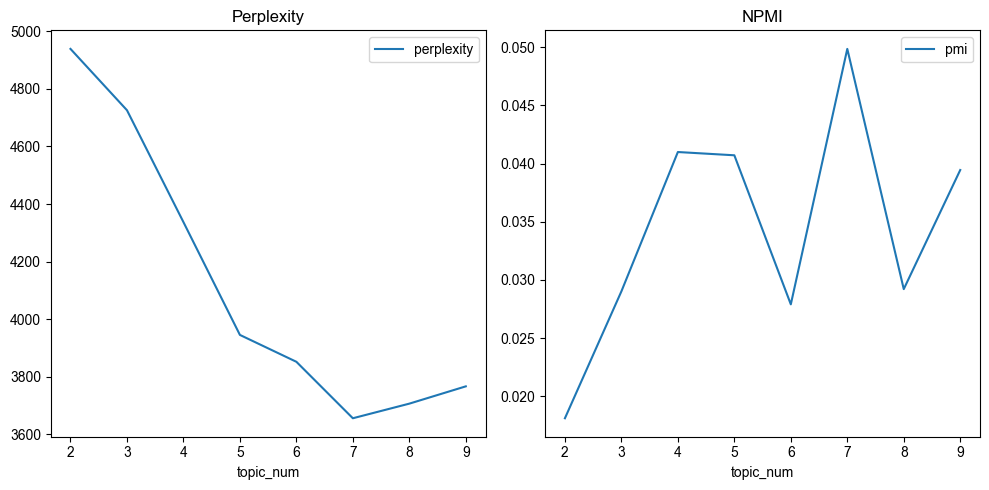

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

result.plot.line(x='topic_num', y='perplexity', ax=axs[0])
axs[0].set_title('Perplexity')

result.plot.line(x='topic_num', y='pmi', ax=axs[1])
axs[1].set_title("NPMI")

plt.tight_layout()
plt.show()

> Â∞±Ë®ìÁ∑¥ÁµêÊûú‰æÜÁúãtopic_num=7ÁÇ∫ÊúÄ‰Ω≥„ÄÇ \
> `perplexity` Âú® 7 ÁöÑÊôÇÊúÄ‰ΩéÔºå`pmi` Âú®‰∏ªÈ°åÊï∏ 7 ÁöÑÊôÇÂÄôÊúÄÈ´òÔºåÂõ†Ê≠§ÊàëÂÄëÂèØ‰ª•ÈÅ∏Êìá‰∏ªÈ°åÊï∏ 7 ‰ΩúÁÇ∫ÊúÄ‰Ω≥‰∏ªÈ°åÊï∏„ÄÇ

## 5. Ë¶ñË¶∫ÂåñÂëàÁèæ

**5.1 Áî¢Áîü LDAvis ÁµêÊûú**

LDAvis ÊòØÊàëÂÄëÁ∂ìÂ∏∏ÊúÉ‰ΩøÁî®ÁöÑË¶ñË¶∫ÂåñÂ∑•ÂÖ∑ÔºåÁõÆÁöÑÁÇ∫Âπ´Âä©ÊàëÂÄëËß£Èáã‰∏ªÈ°åÊ®°Âûã‰∏≠ÔºåÂú®ÊàëÂÄëÂª∫ÊßãÂ•Ω‰∏ªÈ°åÊ®°ÂûãÂæóÂà∞ Œ∏(Êñá‰ª∂ÁöÑ‰∏ªÈ°åÂàÜ‰Ωà) Ë∑ü œÜ(‰∏ªÈ°åÁöÑÂ≠óÂàÜ‰Ωà)ÔºåÈÄèÈÅé pyLDAvis Â∞á‰∏ªÈ°åÈôçÁ∂≠Êàê‰∫åÁ∂≠Ôºå‰ª•Á∂≤È†ÅÁöÑÂΩ¢Âºè‰æõÊàëÂÄëÊü•Áúã„ÄÇ

+ ÂúìÂúàÊï∏Èáè‰ª£Ë°®‰∏ªÈ°åÊï∏ÈáèÔºåÊúâÂπæÂÄã‰∏ªÈ°åÂ∞±ÊúÉÊúâÂπæÂÄãÂúìÂúà
+ ÂúìË∂äÂ§ß‰ª£Ë°® document Ë∂äÂ§ß
+ Âè≥ÈÇäÂèØ‰ª•ÁúãÂà∞‰∏ªÈ°åÁöÑÂ≠óÂàÜ‰Ωà
+ Âè≥‰∏äÂπ´Êúâ‰∏ÄÂÄã bar Ë™øÊï¥ lambdaÔºöÁï∂ lambda=1 ‰πüÂ∞±ÊòØ‰ª£Ë°®Êú¨‰æÜÁöÑÂ≠óÂàÜ‰Ωà œÜÔºåÂ∞á lambda Á∏ÆË∂äÂ∞èÂèØ‰ª•ÁúãÂà∞Ë∂äÂîØ‰∏ÄÁöÑÂ≠óÔºåÂ•ΩÁöÑÂàÜ‰ΩàÊòØ œÜ È´ò‰∏îÂîØ‰∏ÄÔºåÂõ†Ê≠§ÊàëÂÄëË¶ÅÂú®ÈÄôÂÖ©ËÄÖÈñìÂèñÂπ≥Ë°°
+ ÂúìÂøÉË∂äÁõ∏ËøëÔºå‰ª£Ë°®‰∏ªÈ°åÊúÉË∂äÁõ∏‰ººÔºõÂèç‰πãÔºåÂúìÂøÉÂàÜË∂äÈñã‰ª£Ë°®‰∏ªÈ°åÊúâÂîØ‰∏ÄÊÄß<br>
  --> ÂÅáË®≠Ë©ûÂΩôÊú¨‰æÜÊúâ 100 Â≠óÔºåÁ∂≠Â∫¶ÊáâË©≤ÊòØ 100ÔºåÂÅáÂ¶ÇÊú¨‰æÜÁ∂≠Â∫¶Êé•Ëøë(Áõ∏Ëøë)ÁöÑË©±ÔºåÈôçÁ∂≠Âæå‰πüÊúÉÊé•Ëøë(Áõ∏Ëøë)
  

> Ê†πÊìö perplecity Ë∑ü PMI ÁöÑÁµêÊûúÔºåÊàëÂÄëÈÅ∏Êìá‰∏ªÈ°åÊï∏ 7 ‰ΩúÁÇ∫ÊúÄ‰Ω≥‰∏ªÈ°åÊï∏„ÄÇ

In [22]:
model_7 = LdaModel(
    corpus = corpus,
    num_topics = 7,
    id2word=dictionary,
    random_state = 1500,
    passes = 5 # Ë®ìÁ∑¥Ê¨°Êï∏
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_7, corpus, dictionary)
p

2024-05-06 10:38:21,860 : INFO : using symmetric alpha at 0.14285714285714285
2024-05-06 10:38:21,861 : INFO : using symmetric eta at 0.14285714285714285
2024-05-06 10:38:21,863 : INFO : using serial LDA version on this node
2024-05-06 10:38:21,868 : INFO : running online (multi-pass) LDA training, 7 topics, 5 passes over the supplied corpus of 5987 documents, updating model once every 2000 documents, evaluating perplexity every 5987 documents, iterating 50x with a convergence threshold of 0.001000
2024-05-06 10:38:21,869 : INFO : PROGRESS: pass 0, at document #2000/5987
2024-05-06 10:38:22,313 : INFO : merging changes from 2000 documents into a model of 5987 documents
2024-05-06 10:38:22,315 : INFO : topic #4 (0.143): 0.009*"Ë°®Á§∫" + 0.007*"‰ªäÂ§©" + 0.005*"ÁæéÂúã" + 0.004*"‰ªäÂπ¥" + 0.004*"ÊãúÁôª" + 0.004*"Â†±Â∞é" + 0.003*"ÂéªÂπ¥" + 0.003*"ÂÖ¨Âè∏" + 0.003*"Â∑®Ëõã" + 0.003*"Á∏ΩÁµ±"
2024-05-06 10:38:22,316 : INFO : topic #6 (0.143): 0.008*"ÁæéÂúã" + 0.006*"‰∏≠Âúã" + 0.006*"Ë°®Á§∫" + 0

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.087822  0.000418       1        1  23.402379
6     -0.030032 -0.181958       2        1  18.648590
0      0.230465  0.109849       3        1  14.158879
1      0.207846  0.071276       4        1  13.755304
2     -0.208376  0.021177       5        1  11.604135
4     -0.007697 -0.172707       6        1   9.810538
5     -0.280028  0.151945       7        1   8.620174, topic_info=      Term         Freq        Total Category  logprob  loglift
1859    ‰∏≠Âúã  5223.000000  5223.000000  Default  30.0000  30.0000
4693    ÂÑÑÂÖÉ  4061.000000  4061.000000  Default  29.0000  29.0000
2761    Ë≠¶Êñπ  1754.000000  1754.000000  Default  28.0000  28.0000
12514   ÁáüÊî∂  2091.000000  2091.000000  Default  27.0000  27.0000
90      Â∏ÇÂ†¥  3597.000000  3597.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
2713    ÂçîÂä©   219.880258   780.675636   Topic7  -6.0655   1.1840
4973    ÂÆâÂÖ®   232.164733  1437.939021   Topic7  -6.0112   0.6275
10815   Ê™¢Êñπ   202.563644   455.400549   Topic7  -6.1476   1.6409
316     ÂâçÂæÄ   203.425423   495.354536   Topic7  -6.1433   1.5611
531     ÊåáÂá∫   220.953760  3397.744153   Topic7  -6.0607  -0.2818

[581 rows x 6 columns], token_table=       Topic      Freq Term
term                       
656        1  0.016705   ‰∏ÄÂêç
656        2  0.143661   ‰∏ÄÂêç
656        3  0.003341   ‰∏ÄÂêç
656        4  0.011693   ‰∏ÄÂêç
656        5  0.474414   ‰∏ÄÂêç
...      ...       ...  ...
17501      4  0.996386   È´òÊÅØ
15730      5  0.977633  È´òËôπÂÆâ
15730      7  0.012534  È´òËôπÂÆâ
15410      5  0.980655   È´òÈô¢
13509      4  0.994786   ÈªûÊî∂

[1646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 1, 2, 3, 5, 6])

Ê†πÊìö LDAvis ÁöÑÁµêÊûúÔºå‰∏ªÈ°å‰∏ÄÁöÑÂúìÈù¢Á©çÊØîËºÉÂ§ßÔºåÊé®Ê∏¨ÈÄôÂÄã‰∏ªÈ°åÁöÑÊñáÁ´†ÊØîËºÉÂ§öÔºåÂá∫ÁèæËºÉÂ§ö„ÄåÂúãÈöõ„ÄÅÁî¢Ê•≠„ÄÅÊäïË≥á„ÄÅÊàøÂÉπ„ÄçÁ≠âÁ≠âÁöÑÁî¢Á∂ìÁõ∏ÈóúË©ûÂΩôÔºå\
ÂæûÊàëÂÄëË≥áÊñôÂèäÁöÑÊñáÁ´†È°ûÂà•‰æÜÁúãÈóúÊñºÁî¢Á∂ìÁöÑÊñ∞ËÅûÁõ∏ËºÉÊñºÂÖ∂‰ªñÁöÑÁ®ÆÈ°ûÁ¢∫ÂØ¶ÊúâÊØîËºÉÂ§ßÁöÑÊï∏ÁõÆ„ÄÇ\

Êé•ËëóÂÜçÁúãÂà∞„Äå3,4„Äç„Äå2,6„ÄçÁöÑÂúìÂøÉË∑ùÈõ¢Êé•ËøëÔºåÂõ†Ê≠§ÈÄôÂÖ©ÂÄã‰∏ªÈ°åÂèØËÉΩÊúâÁõ∏ÈóúÊÄßÔºåÊää‰ªñÂÄëÁöÑË©ûÂΩôÊãâÂá∫‰æÜÁúã„ÄÇ

In [23]:
model_7.show_topics()

[(0,
  '0.018*"ÂÑÑÂÖÉ" + 0.013*"ÁáüÊî∂" + 0.011*"‰ªäÂπ¥" + 0.011*"ÊàêÈï∑" + 0.010*"ÂéªÂπ¥" + 0.009*"Â∏ÇÂ†¥" + 0.007*"Áî¢ÂìÅ" + 0.006*"ÈúÄÊ±Ç" + 0.006*"ÂÖ¨Âè∏" + 0.006*"ÊØèËÇ°"'),
 (1,
  '0.010*"Â∏ÇÂ†¥" + 0.009*"ÊåáÊï∏" + 0.009*"ÊäïË≥á" + 0.008*"Âè∞ËÇ°" + 0.007*"ÂÑÑÂÖÉ" + 0.006*"‰∏äÊº≤" + 0.006*"‰ªäÂπ¥" + 0.006*"ÊäïË≥á‰∫∫" + 0.005*"ËÇ°ÂÉπ" + 0.005*"Ë°®Áèæ"'),
 (2,
  '0.006*"Ë°®Á§∫" + 0.006*"Ëê¨ÂÖÉ" + 0.005*"Á∂≤Âèã" + 0.004*"ÁôºÁèæ" + 0.003*"ÁôºÁîü" + 0.003*"Ë™çÁÇ∫" + 0.003*"ÊåáÂá∫" + 0.003*"‰ªäÂ§©" + 0.003*"ÂÖ¨Âè∏" + 0.003*"Ë™øÊü•"'),
 (3,
  '0.006*"Âè∞ÁÅ£" + 0.006*"Ë°®Á§∫" + 0.005*"ÁôºÂ±ï" + 0.005*"‰ºÅÊ•≠" + 0.005*"ÂÖ¨Âè∏" + 0.004*"Êèê‰æõ" + 0.004*"ÊúçÂãô" + 0.003*"Âêà‰Ωú" + 0.003*"Â≠óÈ†≠" + 0.003*"ÂúãÈöõ"'),
 (4,
  '0.008*"‰ªäÂ§©" + 0.006*"Âè∞ÁÅ£" + 0.005*"ÊØîË≥Ω" + 0.004*"Â∑®Ëõã" + 0.004*"Ë°®Á§∫" + 0.004*"Êó•Êú¨" + 0.004*"‰ªäÂπ¥" + 0.004*"ËÅØÁõü" + 0.003*"Â∑®‰∫∫" + 0.003*"ÂéªÂπ¥"'),
 (5,
  '0.017*"Ë≠¶Êñπ" + 0.010*"Áî∑Â≠ê" + 0.007*"ÁôºÁèæ" + 0.006*"ÂàÜÂ±Ä" + 0.006*"Ë®òËÄÖ" + 0.005*"Èß

*‰∏ªÈ°å (3,4) ÁöÑË©ûÂΩôÔºö*\
3: ['ÂÑÑÂÖÉ', 'ÁáüÊî∂', '‰ªäÂπ¥', 'ÊàêÈï∑', 'ÂéªÂπ¥', 'Â∏ÇÂ†¥', 'Áî¢ÂìÅ', 'ÈúÄÊ±Ç', 'ÂÖ¨Âè∏', 'ÊØèËÇ°']\
4: ['Â∏ÇÂ†¥', 'ÊåáÊï∏', 'ÊäïË≥á', 'Âè∞ËÇ°', 'ÂÑÑÂÖÉ', '‰∏äÊº≤', '‰ªäÂπ¥', 'ÊäïË≥á‰∫∫', 'ËÇ°ÂÉπ', 'Ë°®Áèæ']

‰ª•‰∏äÂÖ©ÂÄã‰∏ªÈ°åÁöÑË©ûÂΩôÂ§öÈóúÊñºÂ∏ÇÂ†¥„ÄÅÊäïË≥á„ÄÅËÇ°Â∏ÇÁ≠âÁõ∏ÈóúÁöÑË©ûÂΩôÔºåÂõ†Ê≠§ÊàëÂÄëÂèØ‰ª•Êé®Ê∏¨ÈÄôÂÖ©ÂÄã‰∏ªÈ°åÂèØËÉΩÊúâÁõ∏ÈóúÊÄß„ÄÇ

*‰∏ªÈ°å (2,6) ÁöÑË©ûÂΩôÔºö*\
2: ['‰∏≠Âúã', 'Â§ßÈô∏', 'ÁæéÂúã', 'Ë°®Á§∫', 'Â†±Â∞é', 'ÂúãÂÆ∂', 'Â∑•‰Ωú', 'Á∂ìÊøü', 'ÊîøÂ∫ú', 'ÊúÉË≠∞']\
6: ['‰ªäÂ§©', 'Âè∞ÁÅ£', 'ÊØîË≥Ω', 'Â∑®Ëõã', 'Ë°®Á§∫', 'Êó•Êú¨', '‰ªäÂπ¥', 'ËÅØÁõü', 'Â∑®‰∫∫', 'ÂéªÂπ¥']

‰ª•‰∏äÂÖ©ÂÄã‰∏ªÈ°åÈáçÁñäÁöÑÈÉ®ÂàÜÈÉΩÂú®ÂúãÂÆ∂ÁöÑÂêçÁ®±ÊØîËºÉÂ§öÔºåÊé®Ê∏¨Áî±ÊñºÈ´îËÇ≤Êñ∞ËÅûÂ§öÈóúÊñºÂ§ñÂúãÈÅ∏ÊâãÊàñÊòØÂúãÂ§ñË≥Ω‰∫ãÔºåËàáÂúãÈöõÊñ∞ËÅûÁõ∏ÂêåÈÉΩÊúÉÊèêÂà∞ËºÉÂ§öÊ¨°ÁöÑÂúãÂÆ∂ÂêçÁ®±Ôºå\
Â∞éËá¥ÈÄôÂÖ©ÂÄã‰∏ªÈ°åÁöÑË©ûÂΩôÈáçÁñä„ÄÇ

> Ë©¶ËëóÁπ™Ë£Ω topic=5 ÁöÑÁµêÊûú

In [24]:
model_5 = LdaModel(
    corpus = corpus,
    num_topics = 5,
    id2word=dictionary,
    random_state = 1500,
    passes = 5 # Ë®ìÁ∑¥Ê¨°Êï∏
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_5, corpus, dictionary)
p

2024-05-06 10:38:30,908 : INFO : using symmetric alpha at 0.2
2024-05-06 10:38:30,909 : INFO : using symmetric eta at 0.2
2024-05-06 10:38:30,910 : INFO : using serial LDA version on this node
2024-05-06 10:38:30,914 : INFO : running online (multi-pass) LDA training, 5 topics, 5 passes over the supplied corpus of 5987 documents, updating model once every 2000 documents, evaluating perplexity every 5987 documents, iterating 50x with a convergence threshold of 0.001000
2024-05-06 10:38:30,914 : INFO : PROGRESS: pass 0, at document #2000/5987
2024-05-06 10:38:31,345 : INFO : merging changes from 2000 documents into a model of 5987 documents
2024-05-06 10:38:31,347 : INFO : topic #0 (0.200): 0.008*"ÁæéÂúã" + 0.007*"Ë°®Á§∫" + 0.005*"Â†±Â∞é" + 0.005*"‰∏≠Âúã" + 0.004*"‰ªäÂ§©" + 0.003*"ÊãúÁôª" + 0.003*"Á∏ΩÁµ±" + 0.003*"‰ª•Ëâ≤Âàó" + 0.003*"ÂÖ¨Âè∏" + 0.003*"ÊåáÂá∫"
2024-05-06 10:38:31,348 : INFO : topic #1 (0.200): 0.007*"Ë°®Á§∫" + 0.005*"‰ªäÂ§©" + 0.004*"ÁæéÂúã" + 0.004*"‰∏≠Âúã" + 0.003*"Êó•Êú¨

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.098379  0.200432       1        1  26.345684
3      0.020138  0.005228       2        1  24.626242
2     -0.278305 -0.123326       3        1  19.153261
0      0.181540 -0.045972       4        1  16.505498
1      0.175007 -0.036362       5        1  13.369314, topic_info=      Term         Freq        Total Category  logprob  loglift
4693    ÂÑÑÂÖÉ  3962.000000  3962.000000  Default  30.0000  30.0000
12514   ÁáüÊî∂  2029.000000  2029.000000  Default  29.0000  29.0000
90      Â∏ÇÂ†¥  3547.000000  3547.000000  Default  28.0000  28.0000
1859    ‰∏≠Âúã  5638.000000  5638.000000  Default  27.0000  27.0000
2761    Ë≠¶Êñπ  1744.000000  1744.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
458     ‰ªäÂπ¥   738.361689  4130.522091   Topic5  -5.2930   0.2905
942     ÊåÅÁ∫å   624.158507  2574.018567   Topic5  -5.4611   0.5954
390     ÁæéÂúã   632.037648  3377.416096   Topic5  -5.4485   0.3363
616     Ë°®Á§∫   681.136870  6773.132785   Topic5  -5.3737  -0.2847
933     ÊàêÈï∑   509.844648  2475.917210   Topic5  -5.6634   0.4319

[429 rows x 6 columns], token_table=       Topic      Freq Term
term                       
656        1  0.155579   ‰∏ÄÂêç
656        2  0.034757   ‰∏ÄÂêç
656        3  0.781205   ‰∏ÄÂêç
656        4  0.008275   ‰∏ÄÂêç
656        5  0.019861   ‰∏ÄÂêç
...      ...       ...  ...
9806       5  0.003704   ÈßïÈßõ
17501      2  0.003791   È´òÊÅØ
17501      4  0.003791   È´òÊÅØ
17501      5  0.993203   È´òÊÅØ
13509      5  0.989423   ÈªûÊî∂

[1070 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2])

In [25]:
model_5.show_topics()

[(0,
  '0.016*"ÂÑÑÂÖÉ" + 0.011*"ÁáüÊî∂" + 0.011*"‰ªäÂπ¥" + 0.010*"ÊàêÈï∑" + 0.009*"Â∏ÇÂ†¥" + 0.009*"ÂéªÂπ¥" + 0.006*"Áî¢ÂìÅ" + 0.006*"Ë°®Á§∫" + 0.006*"ÈúÄÊ±Ç" + 0.006*"ÂÖ¨Âè∏"'),
 (1,
  '0.010*"Â∏ÇÂ†¥" + 0.010*"ÊåáÊï∏" + 0.009*"ÊäïË≥á" + 0.008*"Âè∞ËÇ°" + 0.007*"‰∏äÊº≤" + 0.006*"ÂÑÑÂÖÉ" + 0.006*"ÊäïË≥á‰∫∫" + 0.005*"ËÇ°ÂÉπ" + 0.005*"‰ªäÂπ¥" + 0.005*"Ë°®Áèæ"'),
 (2,
  '0.008*"Ë≠¶Êñπ" + 0.006*"Áî∑Â≠ê" + 0.006*"Ë°®Á§∫" + 0.005*"ÁôºÁèæ" + 0.005*"ÁôºÁîü" + 0.004*"Ëê¨ÂÖÉ" + 0.003*"Ë®òËÄÖ" + 0.003*"‰ªäÂ§©" + 0.003*"Ë™øÊü•" + 0.003*"ÂàÜÂ±Ä"'),
 (3,
  '0.006*"Ë°®Á§∫" + 0.006*"Âè∞ÁÅ£" + 0.005*"ÁôºÂ±ï" + 0.005*"‰ºÅÊ•≠" + 0.005*"ÂÖ¨Âè∏" + 0.004*"Êèê‰æõ" + 0.004*"ÊúçÂãô" + 0.003*"Âêà‰Ωú" + 0.003*"ÈÄèÈÅé" + 0.003*"ÂúãÈöõ"'),
 (4,
  '0.015*"‰∏≠Âúã" + 0.008*"ÁæéÂúã" + 0.008*"Ë°®Á§∫" + 0.006*"Â§ßÈô∏" + 0.006*"Â†±Â∞é" + 0.005*"ÂúãÂÆ∂" + 0.005*"‰ªäÂ§©" + 0.004*"Âè∞ÁÅ£" + 0.004*"Â∑•‰Ωú" + 0.003*"ÊúÉË≠∞"')]

Âæû‰∏äÂúñ‰æÜÁúãÔºå‰∏ªÈ°å(4,5)ÈÇÑÊòØÊúâÈáçÁñäÁöÑÊÉÖÊ≥ÅÔºåÁúã‰∏Ä‰∏ãË£°Èù¢ÁöÑË©ûÂΩô„ÄÇ

*‰∏ªÈ°å (4,5) ÁöÑË©ûÂΩôÔºö*

4: `['ÂÑÑÂÖÉ', 'ÁáüÊî∂', '‰ªäÂπ¥', 'ÊàêÈï∑', 'Â∏ÇÂ†¥', 'ÂéªÂπ¥', 'Áî¢ÂìÅ', 'Ë°®Á§∫', 'ÈúÄÊ±Ç', 'ÂÖ¨Âè∏']`\
5: `['Â∏ÇÂ†¥', 'ÊåáÊï∏', 'ÊäïË≥á', 'Âè∞ËÇ°', '‰∏äÊº≤', 'ÂÑÑÂÖÉ', 'ÊäïË≥á‰∫∫', 'ËÇ°ÂÉπ', '‰ªäÂπ¥', 'Ë°®Áèæ']`

Ë©ûÂΩôÊ∂µËìã‰∫ÜËÇ°Â∏ÇÊäïË≥áÁõ∏ÈóúÁöÑ‰∏ªÈ°åÔºåÂåÖÊã¨Â∏ÇÂ†¥„ÄÅÊåáÊï∏„ÄÅÊäïË≥á„ÄÅÂè∞ËÇ°„ÄÅËÇ°ÂÉπ„ÄÅ‰ªäÂπ¥„ÄÅÂÑÑÂÖÉÁ≠â„ÄÇ\
Âæó‰ª•Êé®Ê∏¨ÔºåÈÄôÂÖ©ÂÄã‰∏ªÈ°åÂèØËÉΩÈÉΩËàáËÇ°Â∏ÇÁöÑË°®Áèæ„ÄÅÊäïË≥áË∂®Âã¢Á≠âÁõ∏Èóú„ÄÇ

> Ë©¶ËëóÁπ™Ë£Ω topic=4 ÁöÑÁµêÊûú

In [26]:
model_4 = LdaModel(
    corpus = corpus,
    num_topics = 4,
    id2word=dictionary,
    random_state = 1500,
    passes = 7 # Ë®ìÁ∑¥Ê¨°Êï∏
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_4, corpus, dictionary)
p

2024-05-06 10:38:39,179 : INFO : using symmetric alpha at 0.25
2024-05-06 10:38:39,180 : INFO : using symmetric eta at 0.25
2024-05-06 10:38:39,181 : INFO : using serial LDA version on this node
2024-05-06 10:38:39,184 : INFO : running online (multi-pass) LDA training, 4 topics, 7 passes over the supplied corpus of 5987 documents, updating model once every 2000 documents, evaluating perplexity every 5987 documents, iterating 50x with a convergence threshold of 0.001000
2024-05-06 10:38:39,184 : INFO : PROGRESS: pass 0, at document #2000/5987
2024-05-06 10:38:39,606 : INFO : merging changes from 2000 documents into a model of 5987 documents
2024-05-06 10:38:39,608 : INFO : topic #0 (0.250): 0.008*"ÁæéÂúã" + 0.007*"Ë°®Á§∫" + 0.005*"Â†±Â∞é" + 0.004*"‰ªäÂ§©" + 0.004*"‰∏≠Âúã" + 0.004*"ÊãúÁôª" + 0.003*"Á∏ΩÁµ±" + 0.003*"ÂÖ¨Âè∏" + 0.003*"‰ª•Ëâ≤Âàó" + 0.003*"ÊåáÂá∫"
2024-05-06 10:38:39,608 : INFO : topic #1 (0.250): 0.007*"Ë°®Á§∫" + 0.005*"‰ªäÂ§©" + 0.004*"ÁæéÂúã" + 0.003*"‰ªäÂπ¥" + 0.003*"‰∏≠Â

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.025286 -0.120403       1        1  32.526731
2      0.266523  0.028839       2        1  27.501140
0     -0.179517 -0.083902       3        1  24.181068
1     -0.112292  0.175466       4        1  15.791061, topic_info=      Term         Freq        Total Category  logprob  loglift
4693    ÂÑÑÂÖÉ  4150.000000  4150.000000  Default  30.0000  30.0000
4018    ÊåáÊï∏  1683.000000  1683.000000  Default  29.0000  29.0000
12514   ÁáüÊî∂  2121.000000  2121.000000  Default  28.0000  28.0000
90      Â∏ÇÂ†¥  3806.000000  3806.000000  Default  27.0000  27.0000
1859    ‰∏≠Âúã  4780.000000  4780.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
616     Ë°®Á§∫   735.634179  6695.348766   Topic4  -5.4632  -0.3627
942     ÊåÅÁ∫å   542.942792  2659.608335   Topic4  -5.7669   0.2568
546     Êñ∞È´ò   474.767200  1132.810024   Topic4  -5.9011   0.9761
4693    ÂÑÑÂÖÉ   539.865885  4150.003043   Topic4  -5.7726  -0.1938
866     Âè∞ÁÅ£   505.554492  3417.579741   Topic4  -5.8383  -0.0653

[332 rows x 6 columns], token_table=       Topic      Freq Term
term                       
656        1  0.086732   ‰∏ÄÂêç
656        2  0.870473   ‰∏ÄÂêç
656        3  0.006308   ‰∏ÄÂêç
656        4  0.034693   ‰∏ÄÂêç
4750       4  0.984900   ‰∏ÄÊ™î
...      ...       ...  ...
9806       4  0.001734   ÈßïÈßõ
17501      3  0.003306   È´òÊÅØ
17501      4  0.995067   È´òÊÅØ
13109      4  0.994634   ÈÆëÁàæ
13509      4  0.992320   ÈªûÊî∂

[665 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [27]:
model_4.print_topics(num_words=20)

2024-05-06 10:38:49,545 : INFO : topic #0 (0.250): 0.013*"ÂÑÑÂÖÉ" + 0.009*"‰ªäÂπ¥" + 0.008*"Â∏ÇÂ†¥" + 0.008*"ÁáüÊî∂" + 0.008*"ÊàêÈï∑" + 0.007*"ÂéªÂπ¥" + 0.006*"Ë°®Á§∫" + 0.006*"ÂÖ¨Âè∏" + 0.005*"Áî¢ÂìÅ" + 0.005*"ÈúÄÊ±Ç" + 0.005*"ÊåÅÁ∫å" + 0.005*"Áî¢Ê•≠" + 0.004*"ÂÆ¢Êà∂" + 0.004*"ÂÖ®ÁêÉ" + 0.004*"Á¨¨Â≠£" + 0.004*"ÊåáÂá∫" + 0.004*"ÊØèËÇ°" + 0.004*"ÁáüÈÅã" + 0.004*"Áç≤Âà©" + 0.003*"ÁèæÈáë"
2024-05-06 10:38:49,546 : INFO : topic #1 (0.250): 0.010*"ÊåáÊï∏" + 0.008*"Âè∞ËÇ°" + 0.007*"Â∏ÇÂ†¥" + 0.007*"ÊäïË≥á" + 0.006*"ÁæéÂúã" + 0.006*"‰∏äÊº≤" + 0.005*"ÊäïË≥á‰∫∫" + 0.005*"ËÇ°ÂÉπ" + 0.005*"Ë°®Áèæ" + 0.004*"‰ªäÂπ¥" + 0.004*"Ë°®Á§∫" + 0.004*"ÁæéÂÖÉ" + 0.004*"Âü∫Èáë" + 0.004*"Á∂ìÊøü" + 0.004*"ÈôçÊÅØ" + 0.004*"‰ªäÂ§©" + 0.004*"Âà©Áéá" + 0.004*"Â§ñË≥á" + 0.004*"ËÇ°ÊÅØ" + 0.003*"È†êÊúü"
2024-05-06 10:38:49,546 : INFO : topic #2 (0.250): 0.006*"Ë°®Á§∫" + 0.006*"Ë≠¶Êñπ" + 0.005*"‰ªäÂ§©" + 0.004*"Áî∑Â≠ê" + 0.004*"ÁôºÁèæ" + 0.004*"ÁôºÁîü" + 0.004*"Ë®òËÄÖ" + 0.003*"Ëê¨ÂÖÉ" + 0.003*"ÊåáÂá∫" + 0.003*"Â†±Â∞é" 

[(0,
  '0.013*"ÂÑÑÂÖÉ" + 0.009*"‰ªäÂπ¥" + 0.008*"Â∏ÇÂ†¥" + 0.008*"ÁáüÊî∂" + 0.008*"ÊàêÈï∑" + 0.007*"ÂéªÂπ¥" + 0.006*"Ë°®Á§∫" + 0.006*"ÂÖ¨Âè∏" + 0.005*"Áî¢ÂìÅ" + 0.005*"ÈúÄÊ±Ç" + 0.005*"ÊåÅÁ∫å" + 0.005*"Áî¢Ê•≠" + 0.004*"ÂÆ¢Êà∂" + 0.004*"ÂÖ®ÁêÉ" + 0.004*"Á¨¨Â≠£" + 0.004*"ÊåáÂá∫" + 0.004*"ÊØèËÇ°" + 0.004*"ÁáüÈÅã" + 0.004*"Áç≤Âà©" + 0.003*"ÁèæÈáë"'),
 (1,
  '0.010*"ÊåáÊï∏" + 0.008*"Âè∞ËÇ°" + 0.007*"Â∏ÇÂ†¥" + 0.007*"ÊäïË≥á" + 0.006*"ÁæéÂúã" + 0.006*"‰∏äÊº≤" + 0.005*"ÊäïË≥á‰∫∫" + 0.005*"ËÇ°ÂÉπ" + 0.005*"Ë°®Áèæ" + 0.004*"‰ªäÂπ¥" + 0.004*"Ë°®Á§∫" + 0.004*"ÁæéÂÖÉ" + 0.004*"Âü∫Èáë" + 0.004*"Á∂ìÊøü" + 0.004*"ÈôçÊÅØ" + 0.004*"‰ªäÂ§©" + 0.004*"Âà©Áéá" + 0.004*"Â§ñË≥á" + 0.004*"ËÇ°ÊÅØ" + 0.003*"È†êÊúü"'),
 (2,
  '0.006*"Ë°®Á§∫" + 0.006*"Ë≠¶Êñπ" + 0.005*"‰ªäÂ§©" + 0.004*"Áî∑Â≠ê" + 0.004*"ÁôºÁèæ" + 0.004*"ÁôºÁîü" + 0.004*"Ë®òËÄÖ" + 0.003*"Ëê¨ÂÖÉ" + 0.003*"ÊåáÂá∫" + 0.003*"Â†±Â∞é" + 0.002*"Ë™øÊü•" + 0.002*"ÊãúÁôª" + 0.002*"ÈÄ†Êàê" + 0.002*"Ë™çÁÇ∫" + 0.002*"ÁèæÂ†¥" + 0.002*"‰ª•Ëâ≤Âàó" + 0.002*"ÂàÜÂ±Ä" +

* ‰∏ªÈ°å‰∏ÄÔºö`Â∏ÇÂ†¥„ÄÅÁáüÊî∂„ÄÅÊàêÈï∑„ÄÅÂéªÂπ¥„ÄÅÂÖ¨Âè∏„ÄÅÈúÄÊ±Ç„ÄÅÁî¢ÂìÅ„ÄÅÊåÅÁ∫å„ÄÅÁî¢Ê•≠„ÄÅÂÆ¢Êà∂„ÄÅÁ¨¨Â≠£„ÄÅÊåáÂá∫„ÄÅÁáüÈÅã„ÄÅ‰∏ªË¶Å`
* ‰∏ªÈ°å‰∫åÔºö`ÊåáÊï∏„ÄÅÂè∞ËÇ°„ÄÅÂ∏ÇÂ†¥„ÄÅÊäïË≥á„ÄÅÁæéÂúã„ÄÅ‰∏äÊº≤„ÄÅÊäïË≥á‰∫∫„ÄÅËÇ°ÂÉπ„ÄÅË°®Áèæ„ÄÅË°®Á§∫„ÄÅ‰ªäÂπ¥„ÄÅÁ∂ìÊøü„ÄÅÁæéÂÖÉ„ÄÅÈôçÊÅØ„ÄÅÂü∫Èáë„ÄÅÂà©Áéá„ÄÅÂ§ñË≥á„ÄÅËÇ°ÊÅØ„ÄÅÂÑÑÂÖÉ`
* ‰∏ªÈ°å‰∏âÔºö`Ë°®Á§∫„ÄÅË≠¶Êñπ„ÄÅ‰ªäÂ§©„ÄÅÁî∑Â≠ê„ÄÅÁôºÁèæ„ÄÅÁôºÁîü„ÄÅË®òËÄÖ„ÄÅËê¨ÂÖÉ„ÄÅÂ†±Â∞é„ÄÅÊåáÂá∫„ÄÅË™øÊü•„ÄÅË™çÁÇ∫„ÄÅÈÄ†Êàê„ÄÅÁèæÂ†¥„ÄÅÊãúÁôª„ÄÅÂàÜÂ±Ä„ÄÅ‰ª•Ëâ≤Âàó„ÄÅÁï∂ÊôÇ„ÄÅÂÆâÂÖ®„ÄÅÁ∏ΩÁµ±`
* ‰∏ªÈ°åÂõõÔºö`‰∏≠Âúã„ÄÅË°®Á§∫„ÄÅÂ§ßÈô∏„ÄÅÂè∞ÁÅ£„ÄÅÁôºÂ±ï„ÄÅÂ∑•‰Ωú„ÄÅÂúãÂÆ∂„ÄÅÊîøÂ∫ú„ÄÅÊåáÂá∫„ÄÅÁæéÂúã„ÄÅ‰ºÅÊ•≠„ÄÅÁ∂ìÊøü„ÄÅÊèê‰æõ„ÄÅÂÖ¨Âè∏„ÄÅÂúãÈöõ„ÄÅÂêà‰Ωú„ÄÅÂïèÈ°å„ÄÅÂ†±Âëä„ÄÅÊúÉË≠∞„ÄÅÊúçÂãô`

‰ΩøÁî® ChatGPT Â∞çÊñº‰∏ªÈ°åÊ®°ÂûãÁöÑËß£ÈáãÔºåÂèØÂàÜÁÇ∫‰ª•‰∏ãÂπæÂÄã‰∏ªÊèêÔºö

1. **Á∂ìÊøüËàá‰ºÅÊ•≠**\
Ë©ûÂΩôËß£ÈáãÔºöÂ∏ÇÂ†¥„ÄÅÁáüÊî∂„ÄÅÊàêÈï∑„ÄÅÂÖ¨Âè∏„ÄÅÈúÄÊ±Ç„ÄÅÁî¢ÂìÅ„ÄÅÁî¢Ê•≠„ÄÅÂÆ¢Êà∂„ÄÅÊåáÂá∫„ÄÅÁáüÈÅã\
ÂèØËÉΩÁöÑ‰∏ªÈ°åÈ°ûÂà•ÔºöÈÄôÂÄã‰∏ªÈ°åÂæàÂèØËÉΩÊ∂âÂèäÂà∞Á∂ìÊøüÁãÄÊ≥Å„ÄÅ‰ºÅÊ•≠ÁáüÈÅãÊÉÖÊ≥ÅÔºå‰æãÂ¶ÇÂ∏ÇÂ†¥Ë°®Áèæ„ÄÅÂÖ¨Âè∏ÁáüÊî∂„ÄÅÁî¢ÂìÅÈúÄÊ±ÇÁ≠â„ÄÇ

2. **ÈáëËûçÊäïË≥á**\
Ë©ûÂΩôËß£ÈáãÔºöÊåáÊï∏„ÄÅÂè∞ËÇ°„ÄÅÂ∏ÇÂ†¥„ÄÅÊäïË≥á„ÄÅÁæéÂúã„ÄÅ‰∏äÊº≤„ÄÅÊäïË≥á‰∫∫„ÄÅËÇ°ÂÉπ„ÄÅË°®Áèæ„ÄÅË°®Á§∫„ÄÅÈôçÊÅØ„ÄÅÂü∫Èáë„ÄÅÂà©Áéá„ÄÅÂ§ñË≥á„ÄÅËÇ°ÊÅØ„ÄÅÂÑÑÂÖÉ\
ÂèØËÉΩÁöÑ‰∏ªÈ°åÈ°ûÂà•ÔºöÈÄôÂÄã‰∏ªÈ°åÂèØËÉΩËàáÈáëËûçÂ∏ÇÂ†¥Áõ∏ÈóúÔºåÂåÖÊã¨ËÇ°Á•®„ÄÅÂü∫Èáë„ÄÅÊäïË≥áÁ≠âÈáëËûçÈ†òÂüüÁöÑË≠∞È°å„ÄÇ

3. **Êñ∞ËÅû‰∫ã‰ª∂Â†±Â∞é**\
Ë©ûÂΩôËß£ÈáãÔºöË°®Á§∫„ÄÅË≠¶Êñπ„ÄÅ‰ªäÂ§©„ÄÅÁî∑Â≠ê„ÄÅÁôºÁèæ„ÄÅÁôºÁîü„ÄÅË®òËÄÖ„ÄÅÂ†±Â∞é„ÄÅÊåáÂá∫„ÄÅË™øÊü•„ÄÅË™çÁÇ∫„ÄÅÈÄ†Êàê„ÄÅÁèæÂ†¥„ÄÅÊãúÁôª„ÄÅÂàÜÂ±Ä„ÄÅ‰ª•Ëâ≤Âàó„ÄÅÁï∂ÊôÇ„ÄÅÂÆâÂÖ®„ÄÅÁ∏ΩÁµ±\
ÂèØËÉΩÁöÑ‰∏ªÈ°åÈ°ûÂà•ÔºöÈÄôÂÄã‰∏ªÈ°åÂæàÂèØËÉΩÊòØÈóúÊñºÊñ∞ËÅû‰∫ã‰ª∂ÁöÑÂ†±Â∞éÔºåÊ∂âÂèäË≠¶Êñπ„ÄÅ‰∫ã‰ª∂ÁôºÁîüÂú∞Èªû„ÄÅ‰∫∫Áâ©„ÄÅË™øÊü•Á≠âÂÖßÂÆπ„ÄÇ

4. **ÂúãÈöõÈóú‰øÇËàáÊîøÊ≤ª**\
Ë©ûÂΩôËß£ÈáãÔºö‰∏≠Âúã„ÄÅÂ§ßÈô∏„ÄÅÂè∞ÁÅ£„ÄÅÁôºÂ±ï„ÄÅÂ∑•‰Ωú„ÄÅÂúãÂÆ∂„ÄÅÊîøÂ∫ú„ÄÅÊåáÂá∫„ÄÅÁæéÂúã„ÄÅ‰ºÅÊ•≠„ÄÅÁ∂ìÊøü„ÄÅÊèê‰æõ„ÄÅÂÖ¨Âè∏„ÄÅÂúãÈöõ„ÄÅÂêà‰Ωú„ÄÅÂïèÈ°å„ÄÅÂ†±Âëä„ÄÅÊúÉË≠∞„ÄÅÊúçÂãô\
ÂèØËÉΩÁöÑ‰∏ªÈ°åÈ°ûÂà•ÔºöÈÄôÂÄã‰∏ªÈ°åÂèØËÉΩÊ∂âÂèäÂà∞ÂúãÈöõÈóú‰øÇ„ÄÅÊîøÊ≤ªË≠∞È°åÔºåÂåÖÊã¨ÂêÑÂúãÈñìÁöÑÂêà‰Ωú„ÄÅÁ∂ìÊøüÁôºÂ±ï„ÄÅ‰ºÅÊ•≠Ê¥ªÂãïÁ≠â„ÄÇ

## Â∞èÁµê
ÊúÄÂàùÁöÑË≥áÊñôÈõÜÂÖ±ÊúâÂÖ≠ÂÄã‰∏ªÈ°åÔºå‰ΩøÁî®topic=6ÁöÑÂèÉÊï∏‰∏ãÂéªË®ìÁ∑¥‰∏¶Ê≤íÊúâÂæóÂà∞ÊØîËºÉÂ•ΩÁöÑÁµêÊûúÔºåÂ∞çÊñº‰∏ªÈ°åÁöÑÂàáÂàÜ‰∏¶‰∏çÊòØÂæàÊòéÈ°ØÔºå\
Êé•ËëóÈÄèÈÅé Ôºàperplexity, pmiÔºâ ÈÄôÂÖ©ÂÄãÊåáÊ®ô‰æÜÊâæÂá∫ÊúÄ‰Ω≥ÁöÑ‰∏ªÈ°åÊï∏Ôºå‰πãÂæåÂÜçÈÄèÈÅé LDAvis ‰æÜÁúãÂêÑÂÄã‰∏ªÈ°åÁöÑÂàÜ‰ΩàÔºåÈÄ≤ËÄåÊâæÂá∫ÊúÄ‰Ω≥ÁöÑ‰∏ªÈ°åÊï∏„ÄÇ

È¶ñÂÖà‰ª•ÊåáÊ®ôÊâÄÈ°ØÁ§∫ÁöÑÊúÄ‰Ω≥‰∏ªÈ°åÊï∏ 7 ‰ΩúÁÇ∫‰∏ªÈ°åÊï∏ÔºåÈÄèÈÅé LDAvis ‰æÜÁúãÂêÑÂÄã‰∏ªÈ°åÁöÑÂàÜ‰ΩàÔºå\
ÁôºÁèæ‰∏ªÈ°å‰∏ÄÁöÑÂúìÈù¢Á©çÊØîËºÉÂ§ßÔºåÊé®Ê∏¨ÈÄôÂÄã‰∏ªÈ°åÁöÑÊñáÁ´†ÊØîËºÉÂ§öÔºåÂá∫ÁèæËºÉÂ§ö„ÄåÂúãÈöõ„ÄÅÁî¢Ê•≠„ÄÅÊäïË≥á„ÄÅÊàøÂÉπ„ÄçÁ≠âÁ≠âÁöÑÁî¢Á∂ìÁõ∏ÈóúË©ûÂΩôÔºå\
ËÄå‰∏ªÈ°å(3,4)„ÄÅ(2,6)„ÄÅ(4,5)ÁöÑÂúìÂøÉË∑ùÈõ¢Êé•ËøëÔºå‰∏¶‰∏îÊúâÈ´òÂ∫¶ÈáçÁñäÔºåÊé®Ê∏¨ÈÄô‰∫õ‰∏ªÈ°å‰ªçÊúâÁõ∏ÈóúÊÄßÔºå‰∏¶Ê≤íÊúâÂÅöÂà∞ÊúÄÂ•ΩÁöÑÂçÄÈöî„ÄÇ

Ê∏¨Ë©¶‰∫Ütopic=5ÁöÑÁµêÊûúÔºåÁôºÁèæ‰∏ªÈ°å(4,5)ÈÇÑÊòØÊúâÈáçÁñäÁöÑÊÉÖÊ≥ÅÔºåÂõ†Ê≠§ÊàëÂÄëÂèØ‰ª•Êé®Ê∏¨ÈÄôÂÖ©ÂÄã‰∏ªÈ°åÂèØËÉΩÈÉΩËàáËÇ°Â∏ÇÁöÑË°®Áèæ„ÄÅÊäïË≥áË∂®Âã¢Á≠âÁõ∏Èóú„ÄÇ\
ÂèØËÉΩÊòØ„ÄåÁî¢Á∂ì„ÄçËàá„ÄåËÇ°Â∏Ç„ÄçÈÄôÂÖ©ÂÄã‰∏ªÈ°åÊú¨Â∞±Áõ∏ËøëÂÆπÊòìÂΩ¢ÊàêÈáçÁñä„ÄÇ

ÁúãÂà∞Âú®‰∏ªÈ°åÊï∏Ôºù4 ÁöÑÊÉÖÊ≥Å‰∏ãÔºåÂêÑÂÄã‰∏ªÈ°åÁöÑÂúìÂúà‰∏¶‰∏çÈáçÁñäÔºå‰ª£Ë°®Ë™™Âú®ÈÄôÂÄã‰∏ªÈ°åÊï∏‰∏ãÔºåÂêÑÂÄã‰∏ªÈ°åÊòØÁõ∏Â∞çÁç®Á´ãÁöÑ„ÄÇ\

> üì£ ÁôºÁèæÔºö\
> Áï∂ÊàëÂÄë‰ΩøÁî®ËºÉÂ∞ëÁöÑ‰∏ªÈ°åÊï∏Ë®ìÁ∑¥Ê®°ÂûãÔºåÂéüÂÖàË≥áÊñôÁ≠ÜÊï∏ËºÉ‰ΩéÁöÑÊñ∞ËÅûÁ®ÆÈ°ûÂ∞±ÂÆπÊòìË¢´ÂêÉÊéâÔºå\
> ‰æãÂ¶ÇÔºö**„ÄåÈÅãÂãï„Äç‰∏ªÈ°åÁöÑË≥áÊñôÁ≠ÜÊï∏Âè™ÊúâÂÖ∂‰ªñÈ°ûÂà•ÁöÑ‰∏ÄÂçä**ÔºåÂú®‰∏ªÈ°åÊï∏ 4 ÁöÑÊÉÖÊ≥Å‰∏ãÔºåÂπæ‰πéÊ≤íÊúâË¢´ÂàáÂàÜÂá∫‰æÜÔºå\
> ÈÄôÊ®£ÁöÑÊÉÖÊ≥Å‰∏ãÔºåÊàëÂÄëÂèØ‰ª•ÈÄèÈÅéÂ¢ûÂä†‰∏ªÈ°åÊï∏‰æÜËÆìÊ®°ÂûãÊõ¥Á¥∞Á∑ªÁöÑÂàáÂàÜ‰∏ªÈ°å„ÄÇ\
> ÈÄô‰πüÊòØ‰∏ªÈ°åÊ®°ÂûãÁöÑ‰∏ÄÂÄãÈáçË¶ÅÁöÑË™øÊï¥ÂèÉÊï∏„ÄÇ

In [28]:
pyLDAvis.save_html(p, "lda_zh.html")

## 6. GuidedLDA

- ÂéüÂßãÂ•ó‰ª∂: <https://github.com/vi3k6i5/GuidedLDA>  
- 31lab ÂÆ∂Èäò‰øÆÊîπÁâàÊú¨: <https://github.com/Text-Analytics-and-Retrieval/GuidedLDA>

In [29]:
import guidedlda

In [30]:
word2id = dictionary.token2id

Ê†πÊìöÂâçÈù¢ÁöÑLDAÊ®°ÂûãÁµêÊûúÊèê‰æõÁöÑ‰∏ªÈ°å‰ª•Âèä‰∏ªÈ°åÂ≠óÔºåÂú®ÈÄôÈÇäÊèê‰æõÁµ¶guidedLDAÔºåËÆìÊ®°ÂûãÂèØ‰ª•Êõ¥Â•ΩÁöÑÂ≠∏ÁøíÔºåÈÄ≤ËÄåÁî¢ÁîüÊõ¥Â•ΩÁöÑ‰∏ªÈ°åÊ®°Âûã„ÄÇ

In [31]:
seed_topic_list = [
        ['Â∏ÇÂ†¥', 'ÁáüÊî∂', 'ÊàêÈï∑', 'ÂéªÂπ¥', 'ÂÖ¨Âè∏', 'ÈúÄÊ±Ç', 'Áî¢ÂìÅ', 'ÊåÅÁ∫å', 'Áî¢Ê•≠', 'ÂÆ¢Êà∂', 'Á¨¨Â≠£', 'ÊåáÂá∫', 'ÁáüÈÅã', '‰∏ªË¶Å'],
        ['ÊåáÊï∏', 'Âè∞ËÇ°', 'Â∏ÇÂ†¥', 'ÊäïË≥á', 'ÁæéÂúã', '‰∏äÊº≤', 'ÊäïË≥á‰∫∫', 'ËÇ°ÂÉπ', 'Ë°®Áèæ', 'Ë°®Á§∫', '‰ªäÂπ¥', 'Á∂ìÊøü', 'ÁæéÂÖÉ', 'ÈôçÊÅØ', 'Âü∫Èáë', 'Âà©Áéá', 'Â§ñË≥á', 'ËÇ°ÊÅØ', 'ÂÑÑÂÖÉ'],
        ['Ë°®Á§∫', 'Ë≠¶Êñπ', '‰ªäÂ§©', 'Áî∑Â≠ê', 'ÁôºÁèæ', 'ÁôºÁîü', 'Ë®òËÄÖ', 'Ëê¨ÂÖÉ', 'Â†±Â∞é', 'ÊåáÂá∫', 'Ë™øÊü•', 'Ë™çÁÇ∫', 'ÈÄ†Êàê', 'ÁèæÂ†¥', 'ÊãúÁôª', 'ÂàÜÂ±Ä', '‰ª•Ëâ≤Âàó', 'Áï∂ÊôÇ', 'ÂÆâÂÖ®', 'Á∏ΩÁµ±'],
        ['‰∏≠Âúã', 'Ë°®Á§∫', 'Â§ßÈô∏', 'Âè∞ÁÅ£', 'ÁôºÂ±ï', 'Â∑•‰Ωú', 'ÂúãÂÆ∂', 'ÊîøÂ∫ú', 'ÊåáÂá∫', 'ÁæéÂúã', '‰ºÅÊ•≠', 'Á∂ìÊøü', 'Êèê‰æõ', 'ÂÖ¨Âè∏', 'ÂúãÈöõ', 'Âêà‰Ωú', 'ÂïèÈ°å', 'Â†±Âëä', 'ÊúÉË≠∞', 'ÊúçÂãô']
]

seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id

In [32]:
# guidedlda ÈúÄË¶Å DTM Ê†ºÂºè‰ΩúÁÇ∫ inputÔºåÂõ†Ê≠§ÈÄôÈÇäÂà©Áî® corpus2dense() ÊñπÊ≥ïÈÄ≤Ë°åËΩâÊèõ
X = corpus2dense(corpus, len(dictionary), len(corpus)).T.astype(np.int64)

> Áî® topic=4 ‰∏ãÂéªË∑ë

In [33]:
model = guidedlda.GuidedLDA(n_topics=4, n_iter=100, random_state=7, refresh=20)
model.fit(X, seed_topics=seed_topics, seed_confidence=1)

2024-05-06 10:38:50,276 : INFO : n_documents: 5987
2024-05-06 10:38:50,276 : INFO : vocab_size: 19653
2024-05-06 10:38:50,277 : INFO : n_words: 1098743
2024-05-06 10:38:50,277 : INFO : n_topics: 4
2024-05-06 10:38:50,277 : INFO : n_iter: 100
2024-05-06 10:38:53,980 : INFO : <0> log likelihood: -11313916
2024-05-06 10:38:54,598 : INFO : <20> log likelihood: -9523168
2024-05-06 10:38:55,189 : INFO : <40> log likelihood: -9464635
2024-05-06 10:38:55,777 : INFO : <60> log likelihood: -9442404
2024-05-06 10:38:56,361 : INFO : <80> log likelihood: -9421620
2024-05-06 10:38:56,940 : INFO : <99> log likelihood: -9406763


In [35]:
vocab = tuple(dictionary.token2id.keys())

In [36]:
n_top_words = 10
topic_word = model.topic_word_

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][: -(n_top_words + 1) : -1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))
    

doc_topic = model.doc_topic_
term_freq = tuple(dictionary.cfs.values())
doc_len = [sum(v for k, v in doc) for doc in corpus]

## LDAvis
pyLDAvis.enable_notebook()
p = pyLDAvis.prepare(topic_word, doc_topic, doc_len, vocab = vocab, term_frequency = term_freq)
p

Topic 0: Ë°®Á§∫ Âè∞ÁÅ£ ÂÖ¨Âè∏ ‰ºÅÊ•≠ ÁôºÂ±ï Êèê‰æõ Áî¢Ê•≠ ÊúçÂãô Â∏ÇÂ†¥ Êú™‰æÜ
Topic 1: ÂÑÑÂÖÉ Â∏ÇÂ†¥ ‰ªäÂπ¥ ÊàêÈï∑ ÁáüÊî∂ ÂéªÂπ¥ ÊäïË≥á ÊåáÊï∏ È†êÊúü ÊåÅÁ∫å
Topic 2: Ë≠¶Êñπ ‰ªäÂ§© Ë°®Á§∫ Áî∑Â≠ê ÁôºÁèæ Ë®òËÄÖ ÁôºÁîü Ëê¨ÂÖÉ ÊØîË≥Ω ÂàÜÂ±Ä
Topic 3: ‰∏≠Âúã ÁæéÂúã Ë°®Á§∫ Â§ßÈô∏ Â†±Â∞é ÂúãÂÆ∂ Á∂ìÊøü ÊîøÂ∫ú ÊãúÁôª Â∑•‰Ωú


/opt/anaconda3/envs/DL/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.060980  0.244606       1        1  28.220637
0     -0.080651 -0.075951       2        1  25.201140
2      0.268838 -0.121745       3        1  25.054191
1     -0.249167 -0.046909       4        1  21.524031, topic_info=      Term         Freq        Total Category  logprob  loglift
4693    ÂÑÑÂÖÉ  3792.000000  3792.000000  Default  30.0000  30.0000
1859    ‰∏≠Âúã  4309.000000  4309.000000  Default  29.0000  29.0000
90      Â∏ÇÂ†¥  3668.000000  3668.000000  Default  28.0000  28.0000
12514   ÁáüÊî∂  1915.000000  1915.000000  Default  27.0000  27.0000
390     ÁæéÂúã  3670.000000  3670.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
616     Ë°®Á§∫  1122.090749  6943.184502   Topic4  -5.3507  -0.2866
2107    ÂÖ®ÁêÉ   825.333862  1993.582468   Topic4  -5.6579   0.6541
390     ÁæéÂúã   832.328132  3670.543459   Topic4  -5.6495   0.0521
764     ÁõÆÂâç   790.362511  2440.261686   Topic4  -5.7012   0.4086
531     ÊåáÂá∫   795.358418  3414.618582   Topic4  -5.6949   0.0790

[293 rows x 6 columns], token_table=       Topic      Freq Term
term                       
656        1  0.233593   ‰∏ÄÂêç
656        2  0.006313   ‰∏ÄÂêç
656        3  0.760754   ‰∏ÄÂêç
17515      2  1.000530   ‰∏ÄÂù™
10038      2  0.058104   ‰∏äÊº≤
...      ...       ...  ...
7189       1  0.953113   È¶ôÊ∏Ø
7189       3  0.011044   È¶ôÊ∏Ø
7189       4  0.035341   È¶ôÊ∏Ø
9806       2  0.060418   ÈßïÈßõ
9806       3  0.940252   ÈßïÈßõ

[472 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

```
Topic 0: Ë°®Á§∫ Âè∞ÁÅ£ ÂÖ¨Âè∏ ‰ºÅÊ•≠ ÁôºÂ±ï Êèê‰æõ Áî¢Ê•≠ ÊúçÂãô Â∏ÇÂ†¥ Êú™‰æÜ

Topic 1: ÂÑÑÂÖÉ Â∏ÇÂ†¥ ‰ªäÂπ¥ ÊàêÈï∑ ÁáüÊî∂ ÂéªÂπ¥ ÊäïË≥á ÊåáÊï∏ È†êÊúü ÊåÅÁ∫å

Topic 2: Ë≠¶Êñπ ‰ªäÂ§© Ë°®Á§∫ Áî∑Â≠ê ÁôºÁèæ Ë®òËÄÖ ÁôºÁîü Ëê¨ÂÖÉ ÊØîË≥Ω ÂàÜÂ±Ä

Topic 3: ‰∏≠Âúã ÁæéÂúã Ë°®Á§∫ Â§ßÈô∏ Â†±Â∞é ÂúãÂÆ∂ Á∂ìÊøü ÊîøÂ∫ú ÊãúÁôª Â∑•‰Ωú
```


‰ΩøÁî®ÁîüÊàêÂºèAIÊ®°ÂûãChatGPTÂ∞çÊñºguidedLDAÁî¢ÁîüÁöÑ‰∏ªÈ°åÊ®°ÂûãÁöÑËß£ÈáãÔºö

1. **‰ºÅÊ•≠ÁôºÂ±ïËàáÂ∏ÇÂ†¥ÂâçÊôØ**

    ‰∏ªÈ°åÈóúÈçµË©ûÔºöË°®Á§∫„ÄÅÂè∞ÁÅ£„ÄÅÂÖ¨Âè∏„ÄÅ‰ºÅÊ•≠„ÄÅÁôºÂ±ï„ÄÅÊèê‰æõ„ÄÅÁî¢Ê•≠„ÄÅÊúçÂãô„ÄÅÂ∏ÇÂ†¥„ÄÅÊú™‰æÜ\
    ‰∏ªÈ°åËß£ÈáãÔºöÈÄôÂÄã‰∏ªÈ°åÂèØËÉΩÊ∂âÂèäÂà∞Âè∞ÁÅ£‰ºÅÊ•≠ÁöÑÁôºÂ±ïÁãÄÊ≥ÅÔºå‰ª•ÂèäÊú™‰æÜÂ∏ÇÂ†¥ÁöÑË∂®Âã¢„ÄÇÂè∞ÁÅ£‰ºÅÊ•≠ÂèØËÉΩÂú®Êèê‰æõÂêÑÁ®ÆÁî¢Ê•≠ÊúçÂãôÊñπÈù¢ÁôºÊèÆËëóÈáçË¶Å‰ΩúÁî®Ôºå‰∏¶Ëá¥ÂäõÊñºÊì¥Â§ßÂÖ∂Â∏ÇÂ†¥‰ªΩÈ°ç„ÄÇ

2. **Á∂ìÊøüÊàêÈï∑ËàáÊäïË≥áË∂®Âã¢**

    ‰∏ªÈ°åÈóúÈçµË©ûÔºöÂÑÑÂÖÉ„ÄÅÂ∏ÇÂ†¥„ÄÅ‰ªäÂπ¥„ÄÅÊàêÈï∑„ÄÅÁáüÊî∂„ÄÅÂéªÂπ¥„ÄÅÊäïË≥á„ÄÅÊåáÊï∏„ÄÅÈ†êÊúü„ÄÅÊåÅÁ∫å\
    ‰∏ªÈ°åËß£ÈáãÔºöÈÄôÂÄã‰∏ªÈ°åÂèØËÉΩË®éË´ñ‰∫ÜÂ∏ÇÂ†¥ÁöÑÊàêÈï∑ËàáÁáüÊî∂ÊÉÖÊ≥ÅÔºå‰ª•ÂèäÊäïË≥áËÄÖÂ∞çÊú™‰æÜÁöÑÈ†êÊúü„ÄÇË©ûÂΩô‰∏≠ÁöÑ„ÄåÂÑÑÂÖÉ„ÄçÂèØËÉΩÊåáÊ∂âÂà∞ÈæêÂ§ßÁöÑÈáëÈ°çÔºåËÄå„ÄåÊåáÊï∏„ÄçÂèØËÉΩÊåá‰ª£ËÇ°Â∏ÇÊàñÂÖ∂‰ªñÈáëËûçÂ∏ÇÂ†¥ÁöÑÊåáÊï∏„ÄÇ

3. **Ë≠¶ÊñπÂ†±Â∞éËàá‰∫ã‰ª∂ÁôºÁîü**

    ‰∏ªÈ°åÈóúÈçµË©ûÔºöË≠¶Êñπ„ÄÅ‰ªäÂ§©„ÄÅË°®Á§∫„ÄÅÁî∑Â≠ê„ÄÅÁôºÁèæ„ÄÅË®òËÄÖ„ÄÅÁôºÁîü„ÄÅËê¨ÂÖÉ„ÄÅÊØîË≥Ω„ÄÅÂàÜÂ±Ä\
    ‰∏ªÈ°åËß£ÈáãÔºöÈÄôÂÄã‰∏ªÈ°åÂèØËÉΩÊòØÈóúÊñºË≠¶ÊñπÂ†±Â∞éÁöÑÊñ∞ËÅû‰∫ã‰ª∂ÔºåÂèØËÉΩÂåÖÊã¨‰∫Ü‰ªäÂ§©ÁôºÁîüÁöÑ‰∫ãÊÉÖ„ÄÅË≠¶ÊñπÂ∞ç‰∫ã‰ª∂ÁöÑË™™Ê≥ï„ÄÅË®òËÄÖÁöÑÂ†±Â∞é„ÄÅ‰∫ã‰ª∂ÁöÑÁôºÁèæ‰ª•ÂèäËàá‰∫ã‰ª∂Áõ∏ÈóúÁöÑÂú∞ÈªûÊàñ‰∫∫Áâ©„ÄÇ

4. **‰∏≠ÁæéÈóú‰øÇËàáÂúãÂÆ∂ÊîøÁ≠ñ**

    ‰∏ªÈ°åÈóúÈçµË©ûÔºö‰∏≠Âúã„ÄÅÁæéÂúã„ÄÅË°®Á§∫„ÄÅÂ§ßÈô∏„ÄÅÂ†±Â∞é„ÄÅÂúãÂÆ∂„ÄÅÁ∂ìÊøü„ÄÅÊîøÂ∫ú„ÄÅÊãúÁôª„ÄÅÂ∑•‰Ωú\
    ‰∏ªÈ°åËß£ÈáãÔºöÈÄôÂÄã‰∏ªÈ°åÂèØËÉΩË®éË´ñ‰∫Ü‰∏≠ÁæéÂÖ©Âúã‰πãÈñìÁöÑÈóú‰øÇ„ÄÅÂúãÂÆ∂ÁöÑÁ∂ìÊøüÁãÄÊ≥Å‰ª•ÂèäÊîøÂ∫úÁöÑÊîøÁ≠ñËàáÂ∑•‰Ωú„ÄÇ„ÄåÊãúÁôª„ÄçÂèØËÉΩÊåáÊ∂âÂà∞ÁæéÂúãÁöÑÊîøÊ≤ª‰∫∫Áâ©ÔºåËÄå„ÄåÂ†±Â∞é„ÄçÂèØËÉΩÊåáÊ∂âÂà∞Â™íÈ´îÂ∞çÊñºÁõ∏Èóú‰∫ã‰ª∂ÊàñÊÉÖÊ≥ÅÁöÑÂ†±Â∞é„ÄÇ

‰ΩøÁî® ChatGPT Â∞çÊñºÂâçÈù¢ÊôÆÈÄöLDAModel‰∏ªÈ°åÊ®°ÂûãÁöÑËß£ÈáãÔºö

1. **Á∂ìÊøüËàá‰ºÅÊ•≠**\
    Ë©ûÂΩôËß£ÈáãÔºöÂ∏ÇÂ†¥„ÄÅÁáüÊî∂„ÄÅÊàêÈï∑„ÄÅÂÖ¨Âè∏„ÄÅÈúÄÊ±Ç„ÄÅÁî¢ÂìÅ„ÄÅÁî¢Ê•≠„ÄÅÂÆ¢Êà∂„ÄÅÊåáÂá∫„ÄÅÁáüÈÅã\
    ÂèØËÉΩÁöÑ‰∏ªÈ°åÈ°ûÂà•ÔºöÈÄôÂÄã‰∏ªÈ°åÂæàÂèØËÉΩÊ∂âÂèäÂà∞Á∂ìÊøüÁãÄÊ≥Å„ÄÅ‰ºÅÊ•≠ÁáüÈÅãÊÉÖÊ≥ÅÔºå‰æãÂ¶ÇÂ∏ÇÂ†¥Ë°®Áèæ„ÄÅÂÖ¨Âè∏ÁáüÊî∂„ÄÅÁî¢ÂìÅÈúÄÊ±ÇÁ≠â„ÄÇ

2. **ÈáëËûçÊäïË≥á**\
    Ë©ûÂΩôËß£ÈáãÔºöÊåáÊï∏„ÄÅÂè∞ËÇ°„ÄÅÂ∏ÇÂ†¥„ÄÅÊäïË≥á„ÄÅÁæéÂúã„ÄÅ‰∏äÊº≤„ÄÅÊäïË≥á‰∫∫„ÄÅËÇ°ÂÉπ„ÄÅË°®Áèæ„ÄÅË°®Á§∫„ÄÅÈôçÊÅØ„ÄÅÂü∫Èáë„ÄÅÂà©Áéá„ÄÅÂ§ñË≥á„ÄÅËÇ°ÊÅØ„ÄÅÂÑÑÂÖÉ\
    ÂèØËÉΩÁöÑ‰∏ªÈ°åÈ°ûÂà•ÔºöÈÄôÂÄã‰∏ªÈ°åÂèØËÉΩËàáÈáëËûçÂ∏ÇÂ†¥Áõ∏ÈóúÔºåÂåÖÊã¨ËÇ°Á•®„ÄÅÂü∫Èáë„ÄÅÊäïË≥áÁ≠âÈáëËûçÈ†òÂüüÁöÑË≠∞È°å„ÄÇ

3. **Êñ∞ËÅû‰∫ã‰ª∂Â†±Â∞é**\
    Ë©ûÂΩôËß£ÈáãÔºöË°®Á§∫„ÄÅË≠¶Êñπ„ÄÅ‰ªäÂ§©„ÄÅÁî∑Â≠ê„ÄÅÁôºÁèæ„ÄÅÁôºÁîü„ÄÅË®òËÄÖ„ÄÅÂ†±Â∞é„ÄÅÊåáÂá∫„ÄÅË™øÊü•„ÄÅË™çÁÇ∫„ÄÅÈÄ†Êàê„ÄÅÁèæÂ†¥„ÄÅÊãúÁôª„ÄÅÂàÜÂ±Ä„ÄÅ‰ª•Ëâ≤Âàó„ÄÅÁï∂ÊôÇ„ÄÅÂÆâÂÖ®„ÄÅÁ∏ΩÁµ±\
    ÂèØËÉΩÁöÑ‰∏ªÈ°åÈ°ûÂà•ÔºöÈÄôÂÄã‰∏ªÈ°åÂæàÂèØËÉΩÊòØÈóúÊñºÊñ∞ËÅû‰∫ã‰ª∂ÁöÑÂ†±Â∞éÔºåÊ∂âÂèäË≠¶Êñπ„ÄÅ‰∫ã‰ª∂ÁôºÁîüÂú∞Èªû„ÄÅ‰∫∫Áâ©„ÄÅË™øÊü•Á≠âÂÖßÂÆπ„ÄÇ

4. **ÂúãÈöõÈóú‰øÇËàáÊîøÊ≤ª**\
    Ë©ûÂΩôËß£ÈáãÔºö‰∏≠Âúã„ÄÅÂ§ßÈô∏„ÄÅÂè∞ÁÅ£„ÄÅÁôºÂ±ï„ÄÅÂ∑•‰Ωú„ÄÅÂúãÂÆ∂„ÄÅÊîøÂ∫ú„ÄÅÊåáÂá∫„ÄÅÁæéÂúã„ÄÅ‰ºÅÊ•≠„ÄÅÁ∂ìÊøü„ÄÅÊèê‰æõ„ÄÅÂÖ¨Âè∏„ÄÅÂúãÈöõ„ÄÅÂêà‰Ωú„ÄÅÂïèÈ°å„ÄÅÂ†±Âëä„ÄÅÊúÉË≠∞„ÄÅÊúçÂãô\
    ÂèØËÉΩÁöÑ‰∏ªÈ°åÈ°ûÂà•ÔºöÈÄôÂÄã‰∏ªÈ°åÂèØËÉΩÊ∂âÂèäÂà∞ÂúãÈöõÈóú‰øÇ„ÄÅÊîøÊ≤ªË≠∞È°åÔºåÂåÖÊã¨ÂêÑÂúãÈñìÁöÑÂêà‰Ωú„ÄÅÁ∂ìÊøüÁôºÂ±ï„ÄÅ‰ºÅÊ•≠Ê¥ªÂãïÁ≠â„ÄÇ

### Â∞èÁµê
ÈÄèÈÅé GuidedLDA ÊâÄÁîüÊàêÁöÑ‰∏ªÈ°åÊ®°ÂûãÔºåÂèØ‰ª•ÁúãÂà∞‰∏ªÈ°åÁöÑÂàáÂàÜÁõ∏Â∞çÊñºÊôÆÈÄöÁöÑ LDA Ê®°ÂûãÊõ¥Âä†Ê∏ÖÊô∞Ôºå\
‰ΩÜÊòØÂú®ÈÄôÂÄãÊ°à‰æã‰∏≠ÔºåGuidedLDA ‰∏¶Ê≤íÊúâÊØîÊôÆÈÄöÁöÑ LDA Ê®°ÂûãË°®ÁèæÂæóÊõ¥Â•ΩÔºå\
Êé®Ê∏¨ÂèØËÉΩÁöÑÂéüÂõ†ÊòØÂú®ÈÄôÂÄãÊ°à‰æã‰∏≠topic=4ÁöÑÊÉÖÊ≥ÅÔºå‰∏ªÈ°åÁöÑÂàáÂàÜ‰∏¶‰∏çÊòØÂæàÂõ∞Èõ£ÔºåÊôÆÈÄöÁöÑ LDA Ê®°ÂûãÂ∑≤Á∂ìÂèØ‰ª•ÂæóÂà∞‰∏çÈåØÁöÑÁµêÊûúÔºå\
Âõ†Ê≠§ GuidedLDA ‰∏¶Ê≤íÊúâÂ∏∂‰æÜÂ§™Â§ßÁöÑÊîπÈÄ≤„ÄÇ

ÊàëÂÄëÂæûËÅØÂêàÊñ∞ËÅûÁà¨‰∏ã‰æÜÁöÑÊñ∞ËÅûÁ®ÆÈ°ûÊúâ
* „ÄêÈ´îËÇ≤„Äë
* „ÄêÁ§æÊúÉ„Äë
* „ÄêÂúãÈöõ„Äë
* „ÄêÁî¢Á∂ì„Äë
* „ÄêËÇ°Â∏Ç„Äë
* „ÄêÂÖ©Â≤∏„Äë

ÈÄôÈÇäÊàëÂÄëÂèØ‰ª•ÁúãÂà∞‰∏ªÈ°åÁöÑÂàÜÈ°ûÂ§ßËá¥‰∏ä‰πüÊòØÁ¨¶ÂêàÈÉ®ÂàÜÁ®ÆÈ°ûÁöÑÔºå‰æãÂ¶ÇÁ∂ìÊøüËàá‰ºÅÊ•≠„ÄÅÈáëËûçÊäïË≥á„ÄÅÊñ∞ËÅû‰∫ã‰ª∂Â†±Â∞é„ÄÅÂúãÈöõÈóú‰øÇËàáÊîøÊ≤ªÁ≠â‰∏ªÈ°å„ÄÇ

‰ΩÜÊòØÂ¶Ç„ÄåÈ´îËÇ≤„Äç„ÄÅ„ÄåÁî¢Á∂ì„Äç„ÄÅ„ÄåÂÖ©Â≤∏„ÄçÈÄô‰∫õÈ°ûÂà•ÁöÑ‰∏ªÈ°åÂ∞±Ë¢´Ê¶ÇÊã¨Âà∞‰∫ÜÂÖ∂‰ªñ‰∏ªÈ°å‰∏≠ÔºåÈÄô‰πüÊòØ‰∏ªÈ°åÊ®°ÂûãÂàÜÈ°ûÈ°ûÂà•Â§™Â∞ëÁöÑÂïèÈ°å„ÄÇ


# 2nd. Classification with Embeddings
```python

In [37]:
import pandas as pd
import re
import jieba

from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer, models, util
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [38]:
# ‰∏≠Êñá bert-base-chinese
bert_ch = SentenceTransformer('google-bert/bert-base-chinese')

bert_ch.tokenizer.add_special_tokens({'pad_token': '[PAD]'})

2024-05-06 10:40:42,160 : INFO : Load pretrained SentenceTransformer: google-bert/bert-base-chinese
2024-05-06 10:40:42,596 : WARNING : No sentence-transformers model found with name google-bert/bert-base-chinese. Creating a new one with MEAN pooling.
/opt/anaconda3/envs/DL/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/DL/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2024-05-06 10:40:43,897 : INFO : Use pytorch device_name: mps


0

## ‰ΩøÁî® udn Ë≥áÊñôË®ìÁ∑¥Ê®°Âûã

In [39]:
udn = pd.read_csv("./raw_data/udn_news_202402.csv")

In [40]:
# ÈÅéÊøæ nan ÁöÑË≥áÊñô
udn = udn.dropna(subset=['artTitle'])
udn = udn.dropna(subset=['artContent'])
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
udn["artContent"] = udn.artContent.apply(
    lambda x: re.sub("(http|https)://.*", "", x)
)
udn["artTitle"] = udn["artTitle"].apply(
    lambda x: re.sub("(http|https)://.*", "", x)
)
# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
udn["artContent"] = udn.artContent.apply(
    lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
)
udn["artTitle"] = udn["artTitle"].apply(
    lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
)

# Áïô‰∏ã content
udn["content"] = udn["artTitle"] + udn["artContent"]
udn = udn[["content", "artUrl", "artCatagory"]]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê
udn.head()

content  \
0  ‰∏≠ËÅ∑ÈùûÊ®πÂÄíÁå¢ÁåªÊï£ËÄåÊòØÊ°ÉÊùéÊªøÂ§©‰∏ãÊà∞ÂäõÂ§ñÊ∫¢ÂΩ∞È°ØÊ®ÇÂ§©Ê∑±Â∫¶Áî±ÊñºÈÅéÂéªÂπæÂπ¥Âú®Â≠£ÂæåÁöÑ‰ºëË≥ΩÊúüÈñìÁ∏ΩÊòØÂú®‰∫∫Âì°Ë™øÂãï...   
1  ‰∏≠ËÅ∑È©öÂ•á‰∏ÄÂπ¥Âë≥ÂÖ®ÈæçÁ¥ÖËâ≤Â§ßÁ†≤ÂäâÂü∫È¥ªËΩüÂá∫Á•ûÂäáÊú¨Êí∞ÊñáÈçæ‰∫ûËä≥Âπ¥Â∞±ÊõæÂõ†È™®Ë£ÇÂΩ±ÈüøÂá∫Ë≥ΩÂ≠£Êú´ÈÅ≠Ëß∏Ë∫´ÁêÉÊìä‰∏≠ÊâãËÖï...   
2  ‰∏≠ËÅ∑Ëä±Â∫óËÄÅÈóÜ‰∏äÂ∑•Ââç‰∏≠‰ø°ÂÖÑÂºüËΩâÈÅãÊâãÂÆòÂ§ßÂÖÉÂ±ïÈñãÁ¨¨‰∫∫ÁîüÊí∞ÊñáÈçæ‰∫ûËä≥ÁîüÊ∂Ø‰∏≠Â§ßÂçäÊôÇÈñìÈÉΩÂú®ÊÄùÁ¥¢Ë§™‰∏ãÁêÉÂì°Ë∫´ÂàÜ...   
3  ‰∏≠ËÅ∑ÂÜ¨ÁõüÂ±ïÁèæÊâìÊìäÂ§©Ë≥¶Áµ±‰∏ÄÁçÖ‰ΩïÊÅÜ‰ΩëÊΩõÂäõËÇ°Ë°ùÂà∫‰∏ÄËªçÊí∞ÊñáÈÑßÂøÉÁëú‰ΩïÊÅÜ‰ΩëÊòØÊïôÁ∑¥ÂúòÂÖ¨Ë™çË®ìÁ∑¥Ë™çÁúüÊÖãÂ∫¶Á©çÊ•µÈÅ∏...   
4  Â∞ºÂÖãÁÑ°ÊáºÈÄÜÂ¢ÉÂä†ÈÄüÂêëÂâçË°ùÊîªÈò≤ÈÉΩÈÄ≤ÂÖ•Á≤æËã±Á¥öÂà•Á¥êÁ¥ÑÂ∞ºÂÖãÊúÄËøëÂÖ´ÈÄ£ÂãùÂãùÊïóÁ´ô‰∏äÊù±ÂçÄÁ¨¨‰∏âÂ∞ºÂÖãÈÄ≤ÊîªÊïàÁéáÁ¨¨ÂÖ≠Èò≤...   

                                      artUrl artCatagory  
0  https://udn.com/news/story/122629/7746474          ÈÅãÂãï  
1  https://udn.com/news/story/122629/7748599          ÈÅãÂãï  
2  https://udn.com/news/story/122629/7748779          ÈÅãÂãï  
3  https://udn.com/news/story/122629/7748904          ÈÅãÂãï  
4  https://udn.com/news/story/122629/7749189          ÈÅãÂãï

In [ ]:
udn["embeddings"] = udn.content.apply(lambda x: bert_ch.encode(x))
udn.head(3)

content  \
0  ‰∏≠ËÅ∑ÈùûÊ®πÂÄíÁå¢ÁåªÊï£ËÄåÊòØÊ°ÉÊùéÊªøÂ§©‰∏ãÊà∞ÂäõÂ§ñÊ∫¢ÂΩ∞È°ØÊ®ÇÂ§©Ê∑±Â∫¶Áî±ÊñºÈÅéÂéªÂπæÂπ¥Âú®Â≠£ÂæåÁöÑ‰ºëË≥ΩÊúüÈñìÁ∏ΩÊòØÂú®‰∫∫Âì°Ë™øÂãï...   
1  ‰∏≠ËÅ∑È©öÂ•á‰∏ÄÂπ¥Âë≥ÂÖ®ÈæçÁ¥ÖËâ≤Â§ßÁ†≤ÂäâÂü∫È¥ªËΩüÂá∫Á•ûÂäáÊú¨Êí∞ÊñáÈçæ‰∫ûËä≥Âπ¥Â∞±ÊõæÂõ†È™®Ë£ÇÂΩ±ÈüøÂá∫Ë≥ΩÂ≠£Êú´ÈÅ≠Ëß∏Ë∫´ÁêÉÊìä‰∏≠ÊâãËÖï...   
2  ‰∏≠ËÅ∑Ëä±Â∫óËÄÅÈóÜ‰∏äÂ∑•Ââç‰∏≠‰ø°ÂÖÑÂºüËΩâÈÅãÊâãÂÆòÂ§ßÂÖÉÂ±ïÈñãÁ¨¨‰∫∫ÁîüÊí∞ÊñáÈçæ‰∫ûËä≥ÁîüÊ∂Ø‰∏≠Â§ßÂçäÊôÇÈñìÈÉΩÂú®ÊÄùÁ¥¢Ë§™‰∏ãÁêÉÂì°Ë∫´ÂàÜ...   

                                      artUrl artCatagory  \
0  https://udn.com/news/story/122629/7746474          ÈÅãÂãï   
1  https://udn.com/news/story/122629/7748599          ÈÅãÂãï   
2  https://udn.com/news/story/122629/7748779          ÈÅãÂãï   

                                          embeddings  
0  [0.2598603, -0.103336915, -0.13030407, 0.32271...  
1  [0.38988382, 0.0138491485, -0.1023845, 0.16257...  
2  [0.486182, -0.15005, 0.0047927666, 0.27161482,...

In [ ]:
import numpy as np
from ast import literal_eval

In [ ]:
data = udn.copy()

X = data["embeddings"].apply(pd.Series)
y = data["artCatagory"]

# ÊääÊï¥ÂÄãË≥áÊñôÈõÜ‰∏É‰∏âÂàá
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777
)

# print(X_train.head())
# print(y_train.head())

           0         1         2         3         4         5         6    \
2139  0.419848 -0.011116 -0.354665  0.067184 -0.004627 -0.040697 -0.055878   
1916  0.376304  0.039414 -0.362329 -0.045580  0.104265 -0.096845 -0.315971   
258   0.480350  0.020603 -0.117614  0.065926  0.057779 -0.239893  0.021462   
2803  0.124938 -0.156221 -0.432256  0.209314  0.108994 -0.008472 -0.243737   
2089  0.427623 -0.042018 -0.351605  0.131566 -0.150872  0.191713  0.023241   

           7         8         9    ...       758       759       760  \
2139 -0.024846 -0.115148 -0.406072  ...  0.175395 -0.039127  0.211727   
1916  0.175212 -0.213346 -0.079264  ... -0.091282 -0.340814  0.215514   
258  -0.129073 -0.147012 -0.332668  ...  0.039450 -0.261836  0.050737   
2803  0.005351 -0.214306 -0.282695  ...  0.045290 -0.246024  0.114624   
2089 -0.288580 -0.281559 -0.295655  ...  0.172586 -0.029071  0.107264   

           761       762       763       764       765       766       767  
2139  0.026978 

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf

/opt/anaconda3/envs/DL/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
print(y_pred[:10])

['ÂÖ©Â≤∏' 'ÈÅãÂãï' 'ÈÅãÂãï' 'ÈÅãÂãï' 'ÂÖ©Â≤∏' 'ËÇ°Â∏Ç' 'ÂÖ®ÁêÉ' 'ÂÖ®ÁêÉ' 'ÂÖ®ÁêÉ' 'ÂÖ®ÁêÉ']


In [ ]:
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          ÂÖ®ÁêÉ       0.93      0.95      0.94       451
          ÂÖ©Â≤∏       0.96      0.93      0.95       518
          ËÇ°Â∏Ç       0.98      0.99      0.98       616
          ÈÅãÂãï       0.99      0.98      0.99       375

    accuracy                           0.97      1960
   macro avg       0.97      0.96      0.97      1960
weighted avg       0.97      0.97      0.97      1960



## ËÆÄÂèñÈ©óË≠âÁî®ÁöÑ00940Ë≥áÊñôÈõÜ

In [ ]:
cat_dict = {
    'Stock': 'ËÇ°Â∏Ç'
}

In [ ]:
# define preprocess pipeline
def preprocess(df: pd.DataFrame, cols = None) -> pd.DataFrame:
    colNames = list(df)
    df["artContent"] = df.artContent.apply(
        lambda x: re.sub("(http|https)://.*", "", x)
    )
    df["artTitle"] = df["artTitle"].apply(
        lambda x: re.sub("(http|https)://.*", "", x)
    )
    # Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
    df["artContent"] = df.artContent.apply(
        lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
    )
    df["artTitle"] = df["artTitle"].apply(
        lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
    )
    df['artCatagory'] = df['artCatagory'].map(cat_dict)
    df['content'] = df['artTitle'] + df['artContent']
    if 'artComment' in colNames:
        df["artComment"] = df["artComment"].apply(
            lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
        )
        df['content'] += df['artComment']
        df = df.drop(columns=['artComment'])
        
    df = df.drop(columns=['artTitle', 'artContent'])
    df = df.dropna()
    return df

In [ ]:
df_940 = pd.read_csv("./raw_data/ptt_00940_article.csv")
df_940.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...   
1          2  https://www.ptt.cc/bbs/Stock/M.1706326839.A.D0...   
2          3  https://www.ptt.cc/bbs/Stock/M.1708249155.A.1C...   

                      artTitle              artDate    artPoster artCatagory  \
0    [Êñ∞ËÅû]ÂÖÉÂ§ßËá∫ÁÅ£ÂÉπÂÄºÈ´òÊÅØETFÂáÜÂãü3Ôºè11Â±ïÈñãÂãüÈõÜ  2024-01-26 19:53:36   MikeShiver       Stock   
1  [Êñ∞ËÅû]ÂÖÉÂ§ßÂä†ÂÖ•ÊúàÈÖçÊÅØETFÊà∞Â†¥ÔºÅ00940ÁôºË°åÂÉπ10  2024-01-27 11:40:33  kiversonx17       Stock   
2               [Ë´ãÁõä]00940ÁöÑÈÅ∏ËÇ°ÈÇèËºØ  2024-02-18 17:39:12      humbler       Stock   

                                          artContent  \
0  ÂéüÊñáÊ®ôÈ°åÔºöÂÖÉÂ§ß\nËá∫ÁÅ£ÂÉπÂÄº\nÈ´òÊÅØETFÂáÜÂãü 3Ôºè11Â±ïÈñãÂãüÈõÜ\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttp...   
1  ÂéüÊñáÊ®ôÈ°åÔºö\n\nÂÖÉÂ§ßÂä†ÂÖ•ÊúàÈÖçÊÅØETFÊà∞Â†¥ÔºÅ00940ÁôºË°åÂÉπ10ÂÖÉ„ÄÅÊúâÊî∂ÁõäÂπ≥Ê∫ñÈáë„ÄÅ3Êúà11Ëôü...   
2  ÂÖÉÂ§ßÊñ∞ÂãüÈõÜÁöÑÈ´òËÇ°ÊÅØETF 00940Ôºå\nÈô§‰∫ÜÁôºË°åÂÉπ10ÂÖÉÈ©ö‰∫∫‰Ωé‰πãÂ§ñÔºå\nÈÅ∏ËÇ°ÈÇèËºØÁ¥çÂÖ•Êú¨ÁõäÊØî...   

                                          artComment             e_ip  \
0  [{"cmtStatus": "Êé®", "cmtPoster": "abc0922001",...   180.217.136.24   
1  [{"cmtStatus": "Êé®", "cmtPoster": "SuGK", "cmtC...  118.165.210.174   
2  [{"cmtStatus": "Êé®", "cmtPoster": "apeople", "c...  111.251.198.167   

          insertedDate dataSource  
0  2024-01-27 02:04:03        ptt  
1  2024-01-28 02:04:10        ptt  
2  2024-02-19 02:05:29        ptt

In [ ]:
df_940 = df_940.drop(['system_id', 'artUrl', 'artDate', 'artPoster', 'e_ip', 'insertedDate', 'dataSource'], axis=1)
df_940.head()

artTitle artCatagory  \
0    [Êñ∞ËÅû]ÂÖÉÂ§ßËá∫ÁÅ£ÂÉπÂÄºÈ´òÊÅØETFÂáÜÂãü3Ôºè11Â±ïÈñãÂãüÈõÜ       Stock   
1  [Êñ∞ËÅû]ÂÖÉÂ§ßÂä†ÂÖ•ÊúàÈÖçÊÅØETFÊà∞Â†¥ÔºÅ00940ÁôºË°åÂÉπ10       Stock   
2               [Ë´ãÁõä]00940ÁöÑÈÅ∏ËÇ°ÈÇèËºØ       Stock   
3           [Ê®ôÁöÑ]2603Èï∑Ê¶ÆÈ´òËÇ°ÊÅØÈÄÅÈå¢Â§öÂ§öÂ§ö       Stock   
4        Re:[Ê®ôÁöÑ]2603Èï∑Ê¶ÆÈ´òËÇ°ÊÅØÈÄÅÈå¢Â§öÂ§öÂ§ö       Stock   

                                          artContent  \
0  ÂéüÊñáÊ®ôÈ°åÔºöÂÖÉÂ§ß\nËá∫ÁÅ£ÂÉπÂÄº\nÈ´òÊÅØETFÂáÜÂãü 3Ôºè11Â±ïÈñãÂãüÈõÜ\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttp...   
1  ÂéüÊñáÊ®ôÈ°åÔºö\n\nÂÖÉÂ§ßÂä†ÂÖ•ÊúàÈÖçÊÅØETFÊà∞Â†¥ÔºÅ00940ÁôºË°åÂÉπ10ÂÖÉ„ÄÅÊúâÊî∂ÁõäÂπ≥Ê∫ñÈáë„ÄÅ3Êúà11Ëôü...   
2  ÂÖÉÂ§ßÊñ∞ÂãüÈõÜÁöÑÈ´òËÇ°ÊÅØETF 00940Ôºå\nÈô§‰∫ÜÁôºË°åÂÉπ10ÂÖÉÈ©ö‰∫∫‰Ωé‰πãÂ§ñÔºå\nÈÅ∏ËÇ°ÈÇèËºØÁ¥çÂÖ•Êú¨ÁõäÊØî...   
3  1. Ê®ôÁöÑÔºö2603Èï∑Ê¶Æ\n\n2. ÂàÜÈ°ûÔºöÂ§ö\n\n3. ÂàÜÊûê/Ê≠£ÊñáÔºöÁ¥ÖÊµ∑Ëá≥Â∞ëÂÜç‰∫ÇÂÄãÂπæÂÄãÊúà...   
4  https://i.imgur.com/O71Mm0G.jpg\nÊú¨‰æÜÊâìÁÆó$147Ë≤∑Èï∑Ê¶Æ Áµê...   

                                          artComment  
0  [{"cmtStatus": "Êé®", "cmtPoster": "abc0922001",...  
1  [{"cmtStatus": "Êé®", "cmtPoster": "SuGK", "cmtC...  
2  [{"cmtStatus": "Êé®", "cmtPoster": "apeople", "c...  
3  [{"cmtStatus": "Âôì", "cmtPoster": "vvnews", "cm...  
4  [{"cmtStatus": "Âôì", "cmtPoster": "Cheng0810", ...

In [ ]:
df_940 = preprocess(df_940)
df_940.head(3)

artCatagory                                            content
0          ËÇ°Â∏Ç  Êñ∞ËÅûÂÖÉÂ§ßËá∫ÁÅ£ÂÉπÂÄºÈ´òÊÅØÂáÜÂãüÂ±ïÈñãÂãüÈõÜÂéüÊñáÊ®ôÈ°åÂÖÉÂ§ßËá∫ÁÅ£ÂÉπÂÄºÈ´òÊÅØÂáÜÂãüÂ±ïÈñãÂãüÈõÜÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤Âêç...
1          ËÇ°Â∏Ç  Êñ∞ËÅûÂÖÉÂ§ßÂä†ÂÖ•ÊúàÈÖçÊÅØÊà∞Â†¥ÁôºË°åÂÉπÂéüÊñáÊ®ôÈ°åÂÖÉÂ§ßÂä†ÂÖ•ÊúàÈÖçÊÅØÊà∞Â†¥ÁôºË°åÂÉπÂÖÉÊúâÊî∂ÁõäÂπ≥Ê∫ñÈáëÊúàËôüÂãüÈõÜÂéüÊñáÈÄ£ÁµêÁôº...
2          ËÇ°Â∏Ç  Ë´ãÁõäÁöÑÈÅ∏ËÇ°ÈÇèËºØÂÖÉÂ§ßÊñ∞ÂãüÈõÜÁöÑÈ´òËÇ°ÊÅØÈô§‰∫ÜÁôºË°åÂÉπÂÖÉÈ©ö‰∫∫‰Ωé‰πãÂ§ñÈÅ∏ËÇ°ÈÇèËºØÁ¥çÂÖ•Êú¨ÁõäÊØîËá™Áî±ÁèæÈáëÊµÅËÇ°Êù±Ê¨äÁõäÂ†±...

In [ ]:
df_940["embeddings"] = df_940.content.apply(lambda x: bert_ch.encode(x))
df_940.head(3)

artCatagory                                            content  \
0          ËÇ°Â∏Ç  Êñ∞ËÅûÂÖÉÂ§ßËá∫ÁÅ£ÂÉπÂÄºÈ´òÊÅØÂáÜÂãüÂ±ïÈñãÂãüÈõÜÂéüÊñáÊ®ôÈ°åÂÖÉÂ§ßËá∫ÁÅ£ÂÉπÂÄºÈ´òÊÅØÂáÜÂãüÂ±ïÈñãÂãüÈõÜÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤Âêç...   
1          ËÇ°Â∏Ç  Êñ∞ËÅûÂÖÉÂ§ßÂä†ÂÖ•ÊúàÈÖçÊÅØÊà∞Â†¥ÁôºË°åÂÉπÂéüÊñáÊ®ôÈ°åÂÖÉÂ§ßÂä†ÂÖ•ÊúàÈÖçÊÅØÊà∞Â†¥ÁôºË°åÂÉπÂÖÉÊúâÊî∂ÁõäÂπ≥Ê∫ñÈáëÊúàËôüÂãüÈõÜÂéüÊñáÈÄ£ÁµêÁôº...   
2          ËÇ°Â∏Ç  Ë´ãÁõäÁöÑÈÅ∏ËÇ°ÈÇèËºØÂÖÉÂ§ßÊñ∞ÂãüÈõÜÁöÑÈ´òËÇ°ÊÅØÈô§‰∫ÜÁôºË°åÂÉπÂÖÉÈ©ö‰∫∫‰Ωé‰πãÂ§ñÈÅ∏ËÇ°ÈÇèËºØÁ¥çÂÖ•Êú¨ÁõäÊØîËá™Áî±ÁèæÈáëÊµÅËÇ°Êù±Ê¨äÁõäÂ†±...   

                                          embeddings  
0  [0.46057558, 0.15931085, -0.29422402, 0.048844...  
1  [0.41123766, 0.18158676, -0.252609, 0.05145976...  
2  [0.41199562, 0.25616938, -0.17547035, 0.231156...

### ÈÄ≤Ë°åÈ©óË≠â

In [ ]:
X_940 = df_940["embeddings"].apply(pd.Series)
y_940 = df_940["artCatagory"]

y_pred_940 = clf.predict(X_940)
y_pred_proba_940 = clf.predict_proba(X_940)
print(y_pred_940[:10])

print(classification_report(y_940, y_pred_940, zero_division=0))

['ËÇ°Â∏Ç' 'ËÇ°Â∏Ç' 'ËÇ°Â∏Ç' 'ËÇ°Â∏Ç' 'ËÇ°Â∏Ç' 'ËÇ°Â∏Ç' 'ËÇ°Â∏Ç' 'ËÇ°Â∏Ç' 'ËÇ°Â∏Ç' 'ËÇ°Â∏Ç']
              precision    recall  f1-score   support

          ÂÖ©Â≤∏       0.00      0.00      0.00         0
          ËÇ°Â∏Ç       1.00      0.99      0.99       177

    accuracy                           0.99       177
   macro avg       0.50      0.49      0.50       177
weighted avg       1.00      0.99      0.99       177



### ‰ª•‰∏ãÁÇ∫‰πãÂâç‰ΩøÁî® DTM ‰ΩúÁÇ∫Ë®ìÁ∑¥Ë≥áÊñôÁöÑÁµêÊûú

In [ ]:
# # È©óË≠âÊ®°Âûã
# X = df_940['words']
# y = df_940['artCatagory']

# y_pred = model_set['clf_mlp'].predict(vectorizer.transform(X).toarray())
# print(classification_report(y, y_pred, zero_division=1))

              precision    recall  f1-score   support

          ÂúãÈöõ       0.00      1.00      0.00         0
          Á§æÊúÉ       0.00      1.00      0.00         0
          ËÇ°Â∏Ç       1.00      0.88      0.94       195
          È´îËÇ≤       0.00      1.00      0.00         0

    accuracy                           0.88       195
   macro avg       0.25      0.97      0.23       195
weighted avg       1.00      0.88      0.94       195



```
‰ΩøÁî® embeddings + ÂàÜÈ°ûÂô®
              precision    recall  f1-score   support
          ËÇ°Â∏Ç       1.00      *0.99     *0.99       177

‰ΩøÁî® DTM + ÂàÜÈ°ûÂô®
              precision    recall  f1-score   support
          ËÇ°Â∏Ç       1.00      0.88      0.94       195
```

### Â∞èÁµê
Âæû‰∏äËø∞ÁöÑÁµêÊûú‰æÜÁúãÔºå\
‰ΩøÁî® embeddings + ÂàÜÈ°ûÂô®ÁöÑÁµêÊûúÊØî‰ΩøÁî® DTM + ÂàÜÈ°ûÂô®ÁöÑÁµêÊûúÂ•ΩÔºåÈÄô‰πüÊòØÂõ†ÁÇ∫ embeddings ÂèØ‰ª•Êõ¥Â•ΩÁöÑË°®ÈÅîË©ûÂΩô‰πãÈñìÁöÑÈóú‰øÇÔºå\
ÈÄ≤ËÄåÊèêÂçáÊ®°ÂûãÁöÑË°®Áèæ„ÄÇ